In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors as mcolors

file_name = "cars.csv"

## Understanding and Exploring the Dataset

In [39]:
df = pd.read_csv(file_name)

In [4]:
df.head()

Sales in Thousands  Year Resale Value  Price in Thousands  Engine Size  \
0              16.919             16.360              21.500          1.8   
1              39.384             19.875              28.400          3.2   
2              20.397             22.255              23.990          1.8   
3              18.780             23.555              33.950          2.8   
4              91.561             12.475              21.975          3.1   

   Horsepower  Wheelbase  Width  Length  Curb Weight  Fuel Capacity  \
0         140      101.2   67.3   172.4        2.639           13.2   
1         225      108.1   70.3   192.9        3.517           17.2   
2         150      102.6   68.2   178.0        2.998           16.4   
3         200      108.7   76.1   192.0        3.561           18.5   
4         175      109.0   72.7   194.6        3.368           17.5   

   Fuel Efficiency  Power Perf Factor  Vehicle Type Car  \
0               28          58.280150                 0   
1               25          91.370778                 0   
2               27          62.777639                 0   
3               22          84.565105                 0   
4               25          71.181451                 0   

   Vehicle Type Passenger  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

In [5]:
df.describe() 

Sales in Thousands  Year Resale Value  Price in Thousands  Engine Size  \
count          100.000000         100.000000          100.000000   100.000000   
mean            66.591890          14.108400           21.303170     2.868000   
std             78.510354           4.570593            6.756369     0.890339   
min              0.110000           5.160000            9.235000     1.000000   
25%             20.392750          10.593750           16.538750     2.000000   
50%             37.646500          13.450000           20.470000     2.750000   
75%             80.758500          16.875000           25.473750     3.500000   
max            540.561000          26.975000           39.665000     5.200000   

       Horsepower   Wheelbase       Width      Length  Curb Weight  \
count  100.000000  100.000000  100.000000  100.000000   100.000000   
mean   166.590000  107.302000   70.988000  187.573000     3.262000   
std     42.585646    7.906831    3.625674   14.038215     0.582914   
min     55.000000   93.100000   62.600000  149.400000     1.895000   
25%    132.000000  102.550000   68.300000  177.900000     2.888750   
50%    165.500000  106.700000   70.300000  186.450000     3.272000   
75%    200.000000  109.825000   73.200000  195.150000     3.590250   
max    275.000000  138.700000   79.300000  224.500000     4.808000   

       Fuel Capacity  Fuel Efficiency  Power Perf Factor  Vehicle Type Car  \
count     100.000000       100.000000         100.000000        100.000000   
mean       17.476000        24.570000          67.887260          0.280000   
std         3.868106         4.492991          17.556987          0.451261   
min        10.300000        15.000000          23.276272          0.000000   
25%        15.075000        22.000000          53.527624          0.000000   
50%        17.000000        25.000000          67.332736          0.000000   
75%        19.000000        27.000000          81.212089          1.000000   
max        32.000000        45.000000         113.765874          1.000000   

       Vehicle Type Passenger  
count              100.000000  
mean                 0.720000  
std                  0.451261  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': missing_percentage})
missing_data_df

Missing Values  Percentage Missing
Sales in Thousands                   0                 0.0
Year Resale Value                    0                 0.0
Price in Thousands                   0                 0.0
Engine Size                          0                 0.0
Horsepower                           0                 0.0
Wheelbase                            0                 0.0
Width                                0                 0.0
Length                               0                 0.0
Curb Weight                          0                 0.0
Fuel Capacity                        0                 0.0
Fuel Efficiency                      0                 0.0
Power Perf Factor                    0                 0.0
Vehicle Type Car                     0                 0.0
Vehicle Type Passenger               0                 0.0

In [7]:
n_unique_values = df.nunique()
n_unique_values 

Sales in Thousands        100
Year Resale Value          97
Price in Thousands         99
Engine Size                24
Horsepower                 47
Wheelbase                  62
Width                      57
Length                     86
Curb Weight                96
Fuel Capacity              40
Fuel Efficiency            20
Power Perf Factor          99
Vehicle Type Car            2
Vehicle Type Passenger      2
dtype: int64

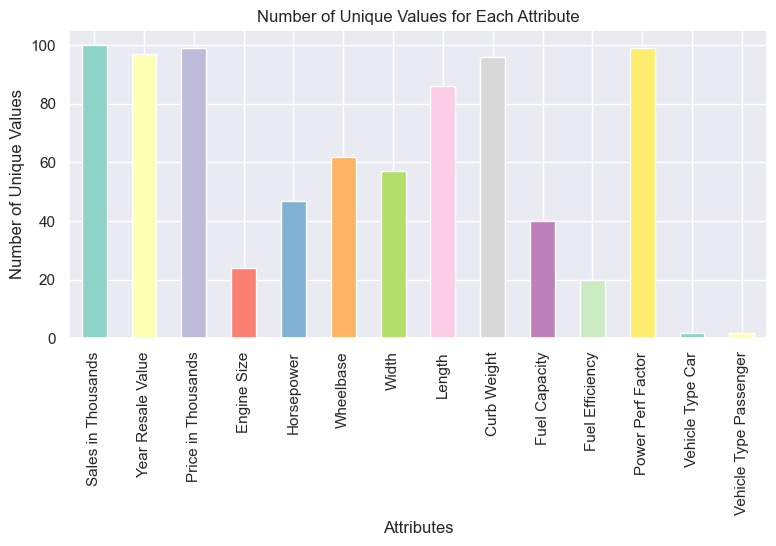

In [8]:
unique_counts = df.nunique()

sns.set_theme()
colors = sns.color_palette('Set3')
unique_counts.plot(kind='bar', figsize=(9, 4), color=colors)
plt.title('Number of Unique Values for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Number of Unique Values')
plt.show()

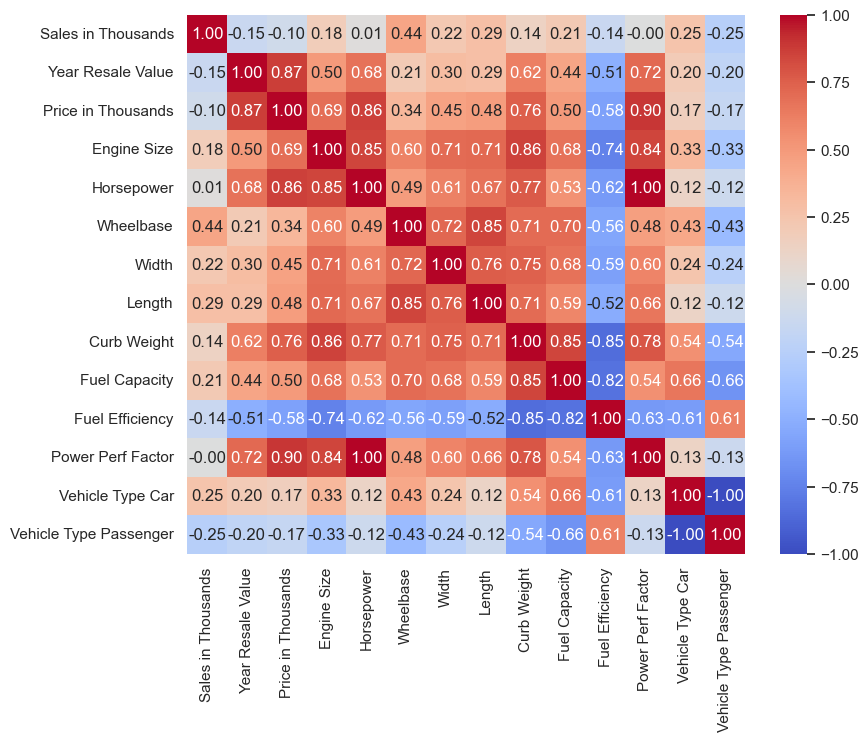

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

<Figure size 500x500 with 0 Axes>

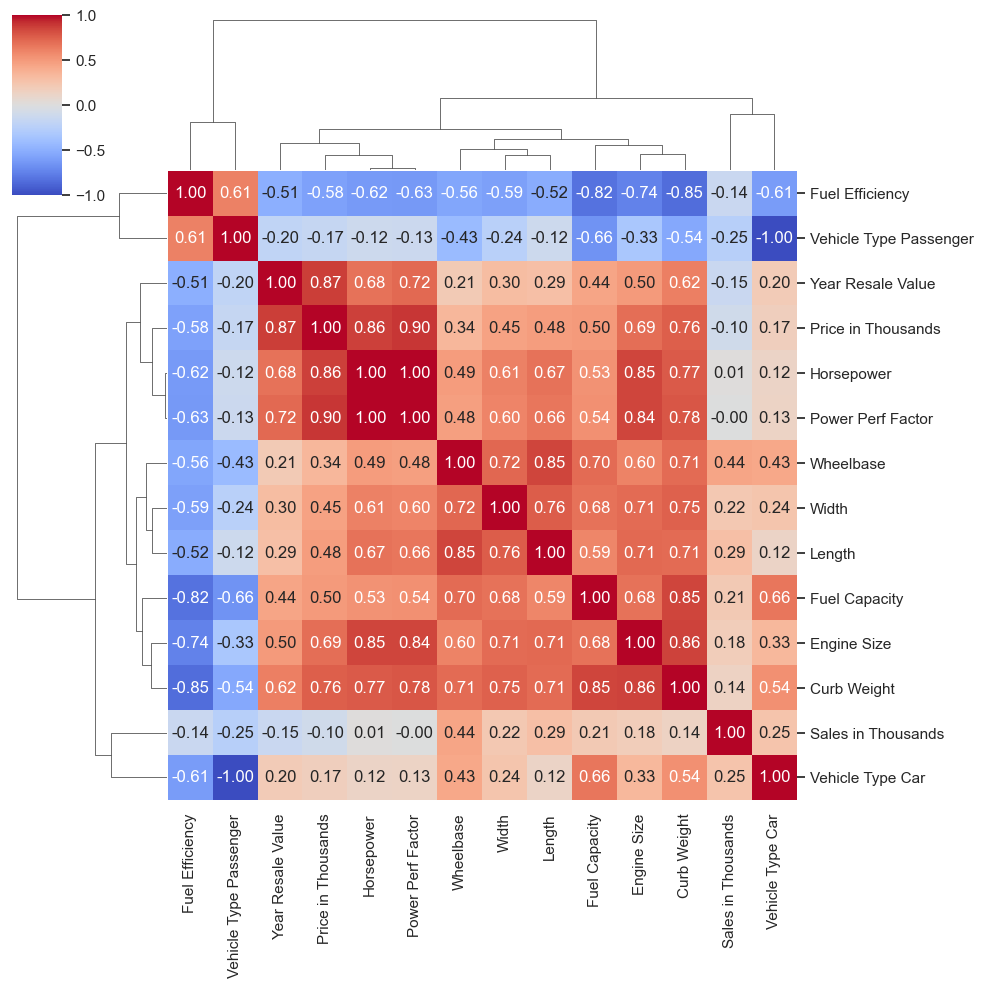

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

[]

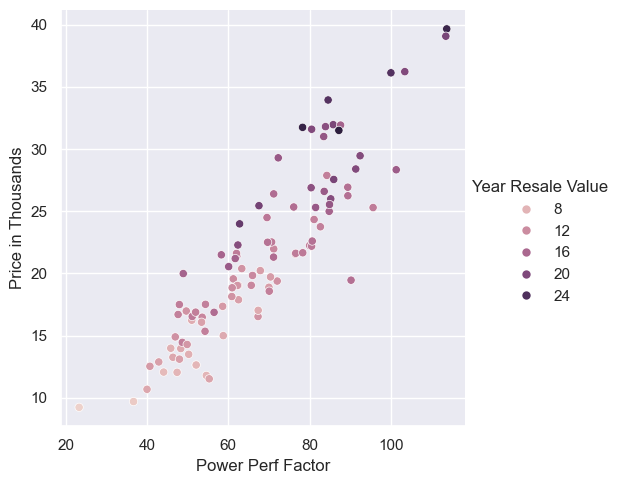

In [55]:
sns.relplot(data=df, x="Power Perf Factor", y="Price in Thousands", hue="Year Resale Value")
plt.plot()

[]

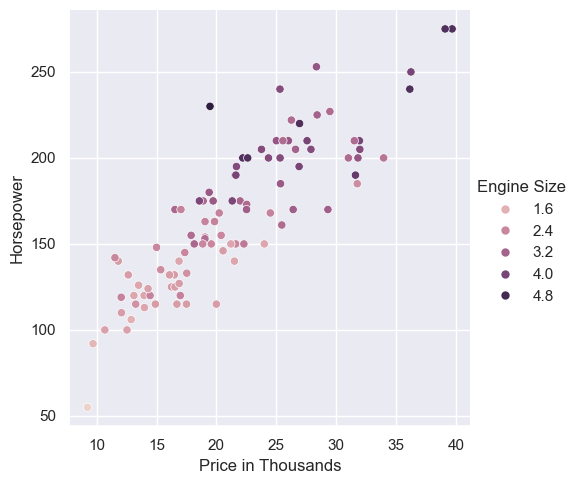

In [56]:
sns.relplot(data=df, x="Price in Thousands", y="Horsepower", hue="Engine Size")
plt.plot()

In [19]:
def visualize_feature_correlations(df, column, target):
    sns.set_theme()
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Scatter plot 
    axes[0].scatter(df[column], df[target])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel(target)
    axes[0].set_title(f'{target} vs. {column} (Scatter)')
    axes[0].grid(True)

    # Hexbin plot
    axes[1].hexbin(df[column], df[target], gridsize=(20, 20), cmap='coolwarm')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel(target)
    axes[1].set_title(f'{target} vs. {column} (Hexbin)')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

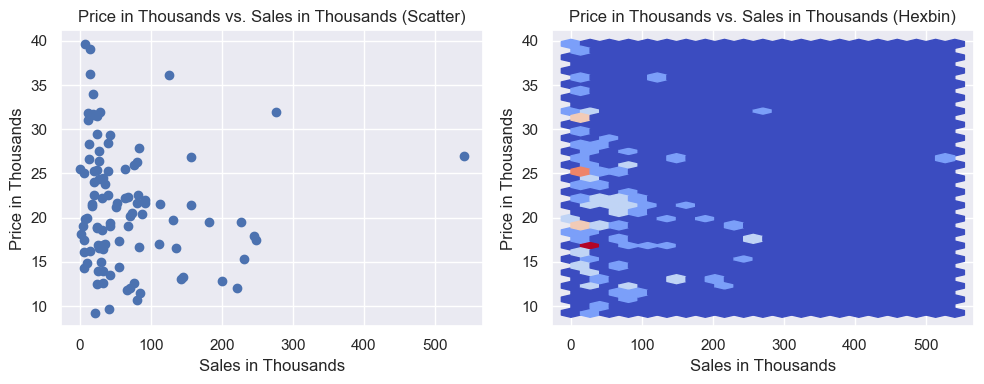

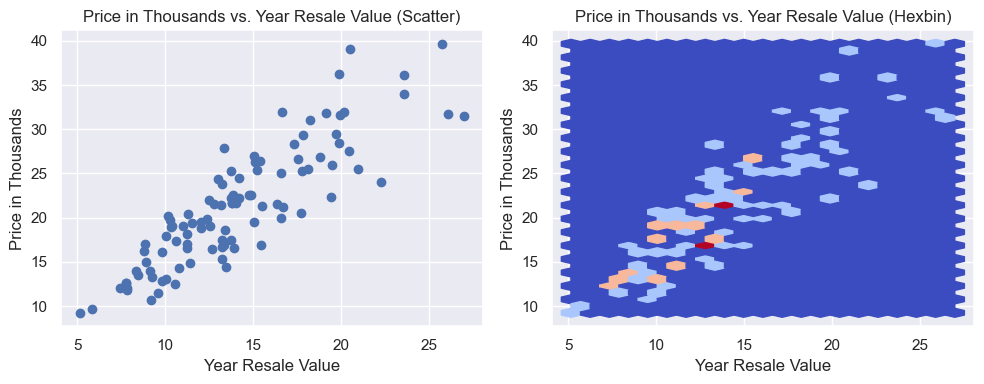

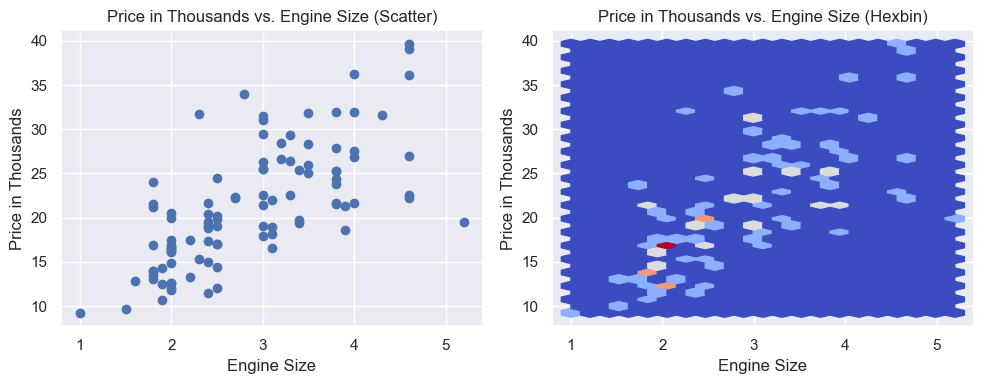

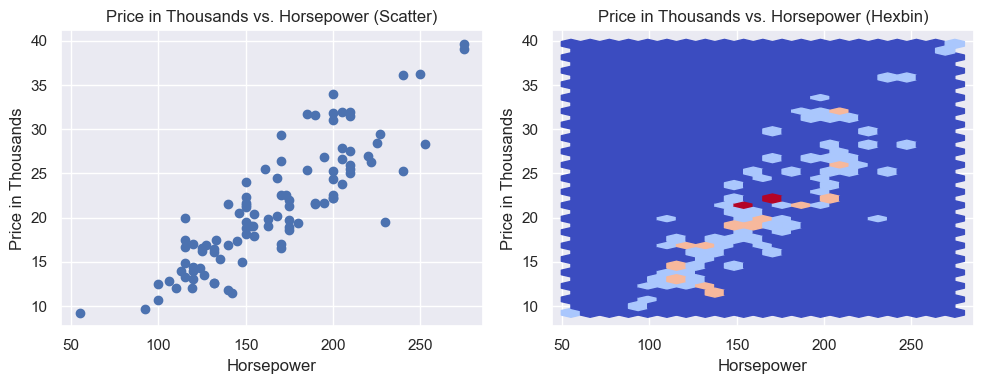

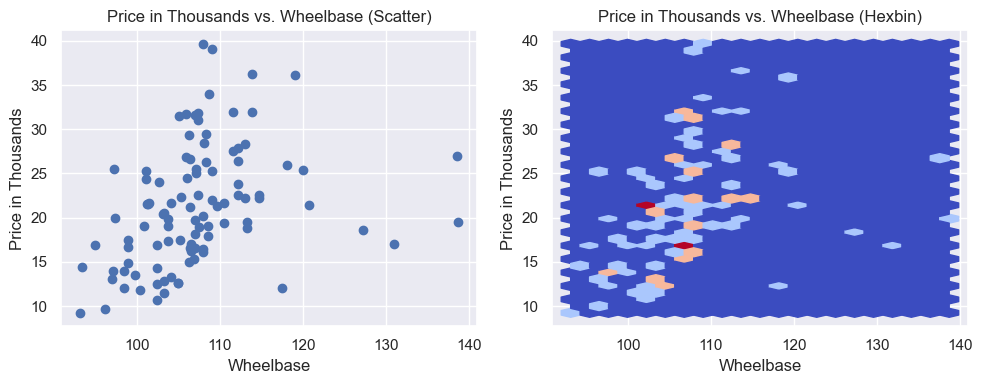

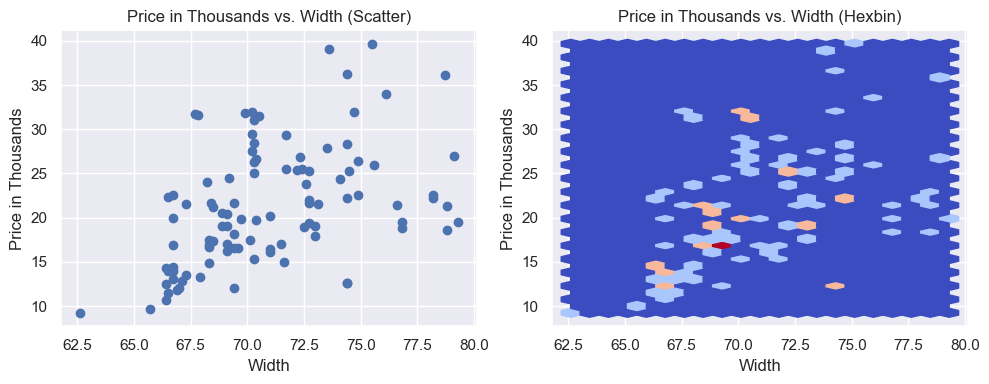

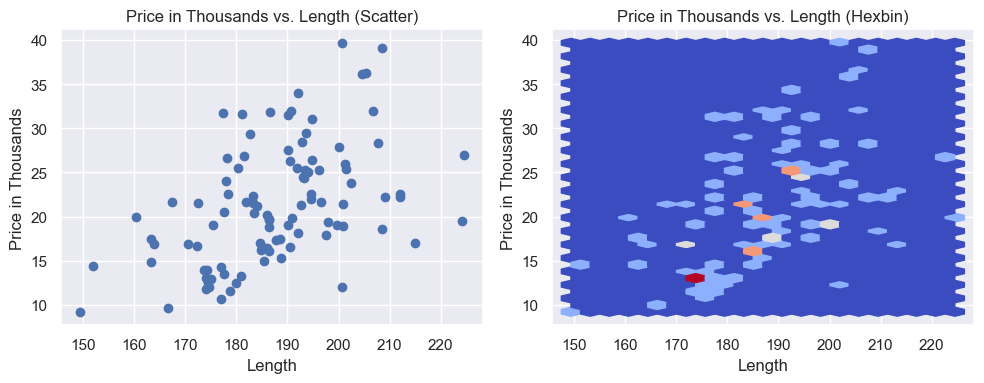

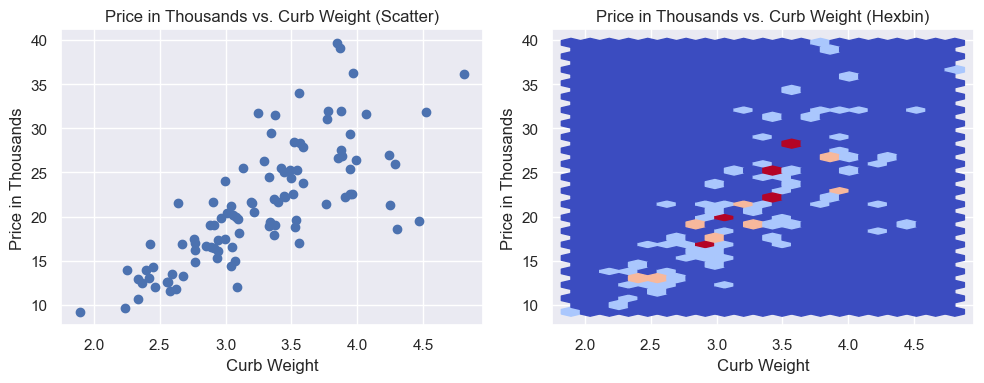

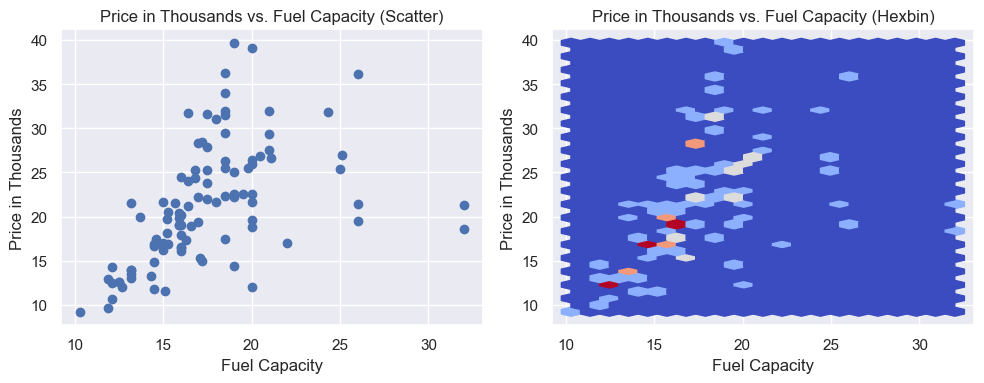

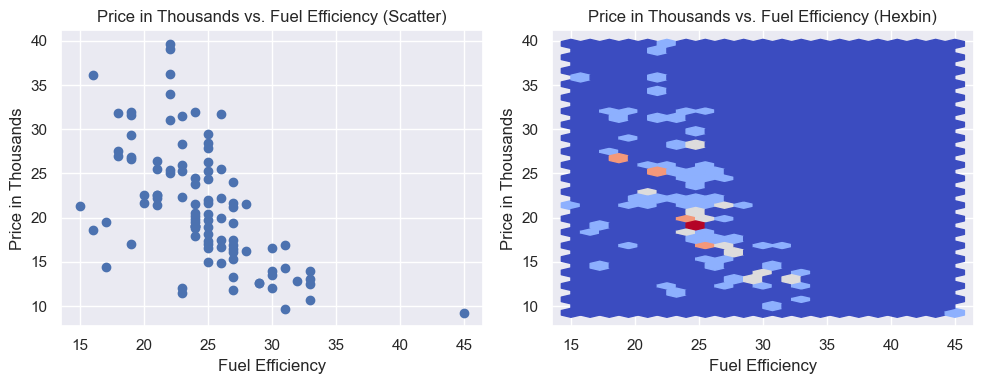

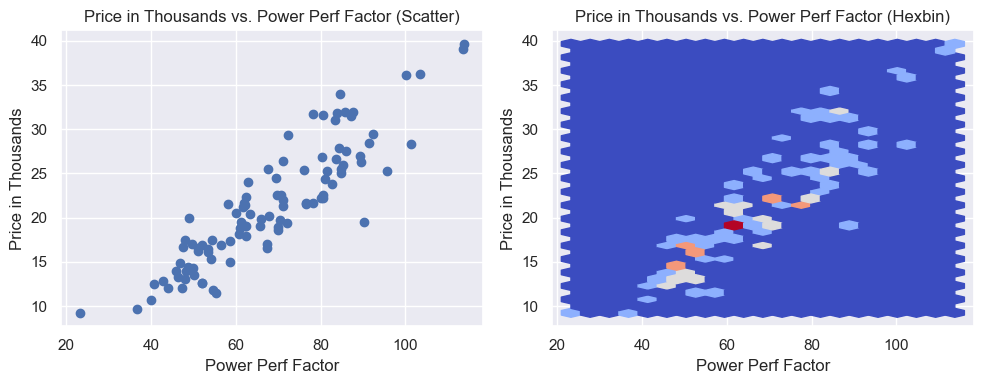

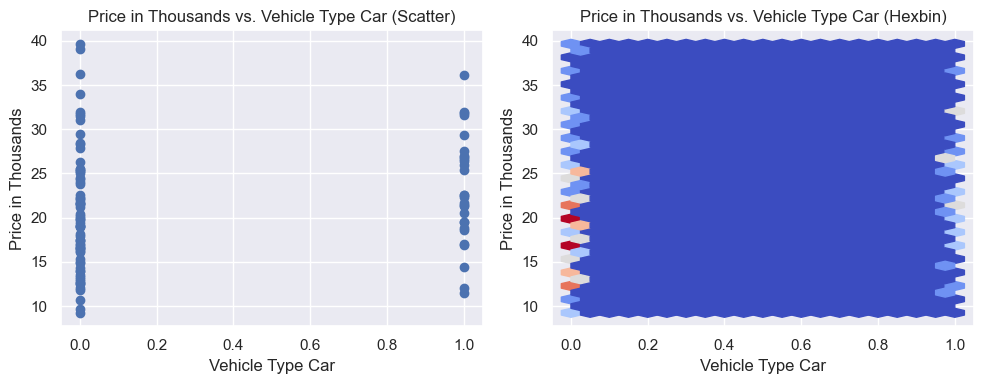

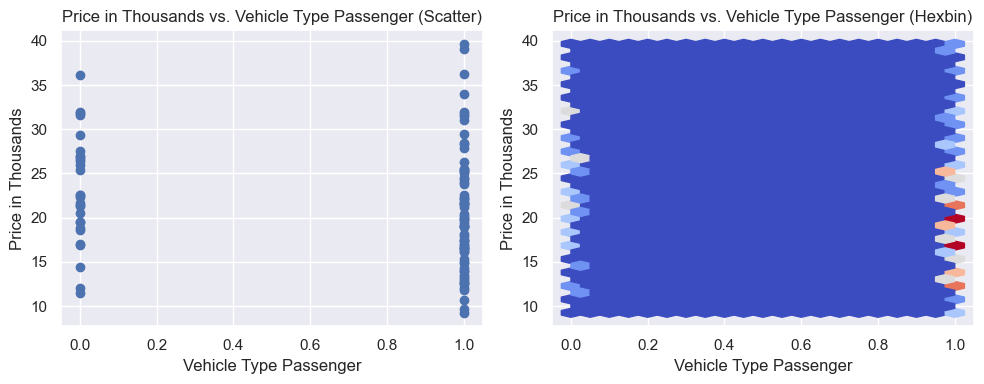

In [21]:
target = "Price in Thousands"
for col, _ in df.items():
    if col != target:
        visualize_feature_correlations(df ,col, target)

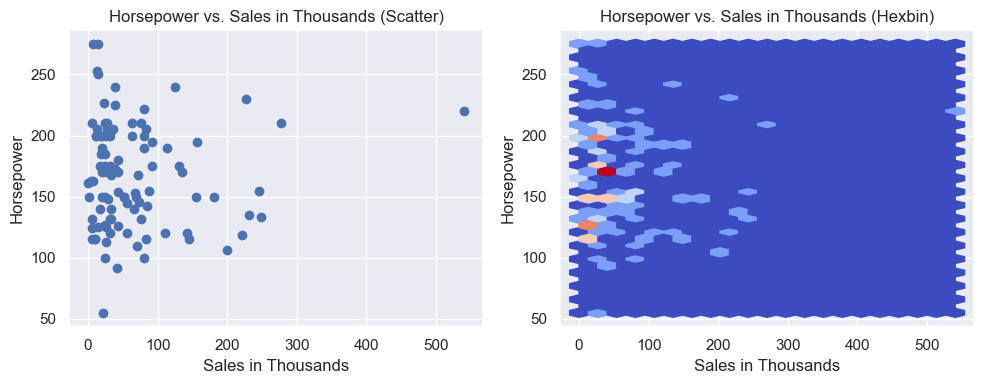

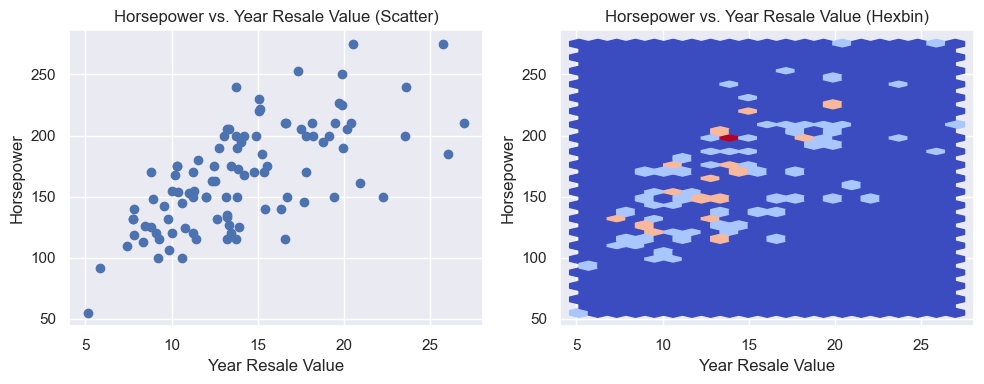

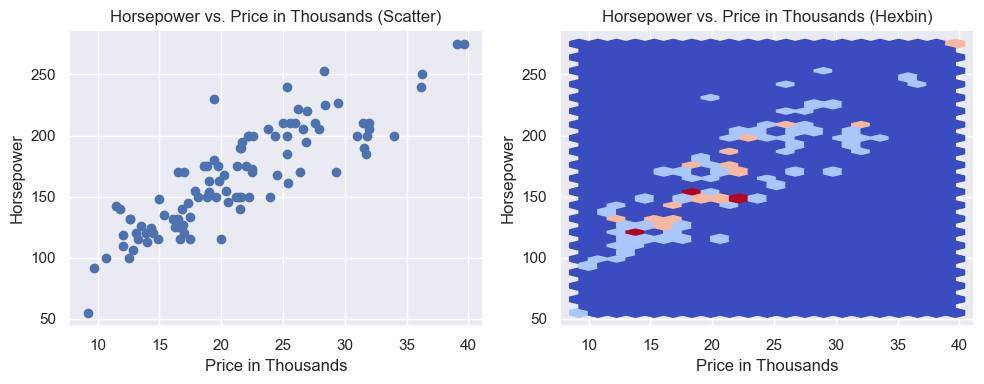

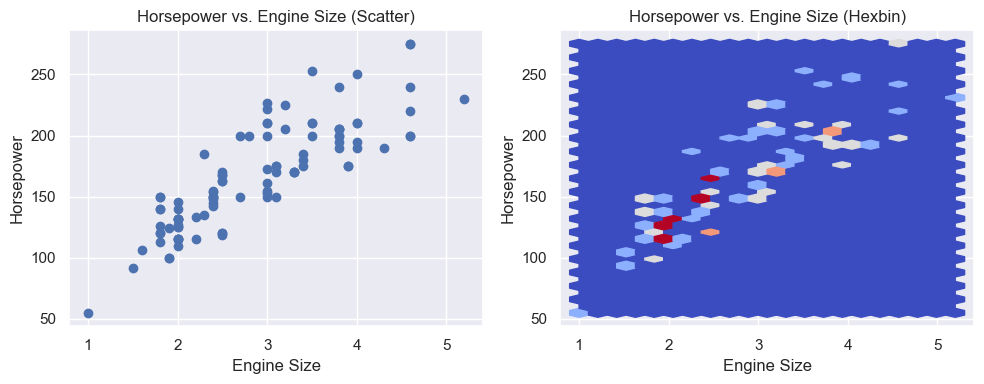

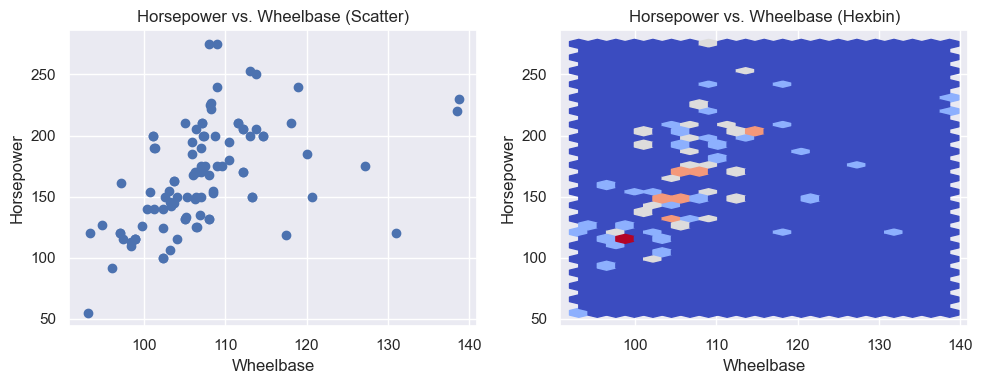

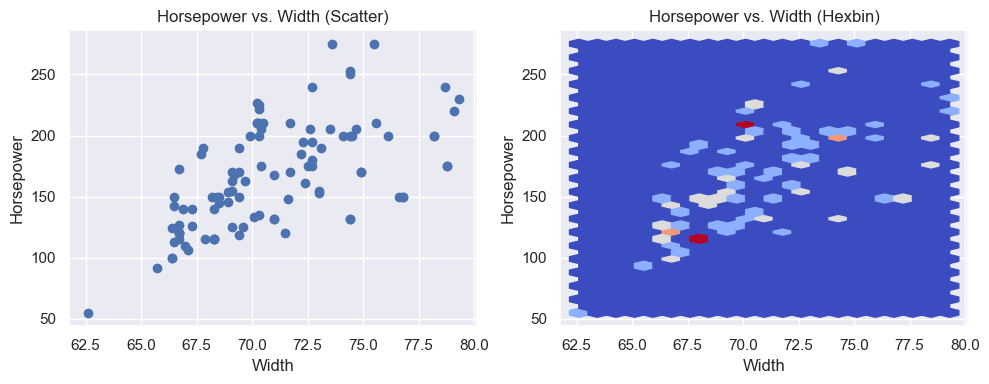

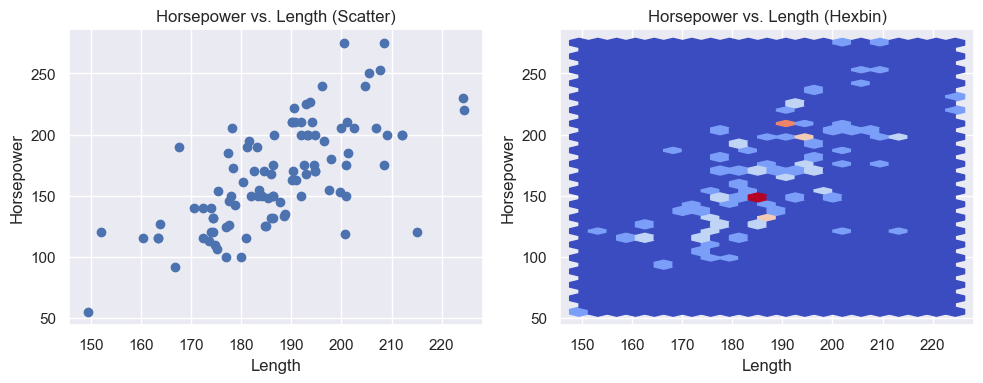

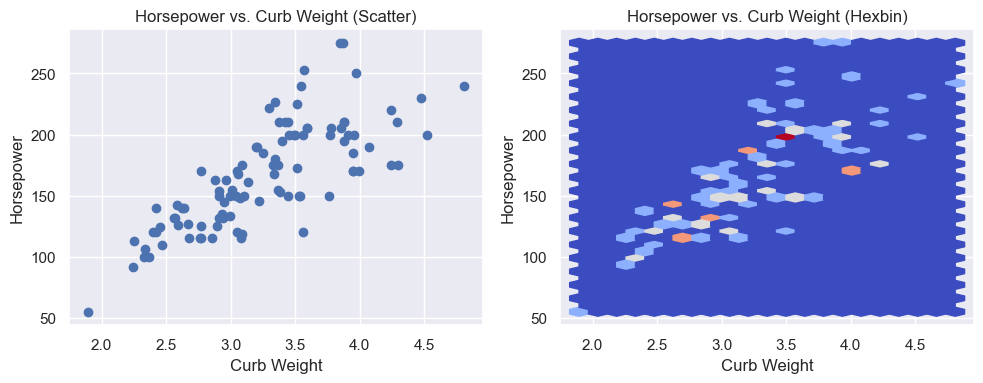

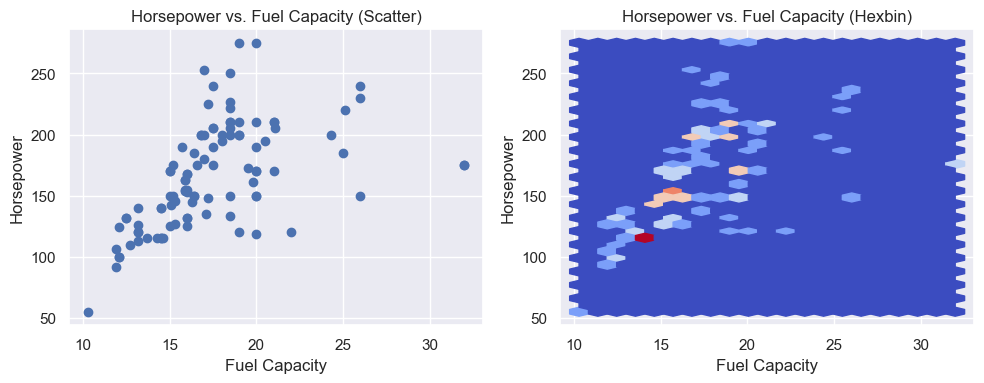

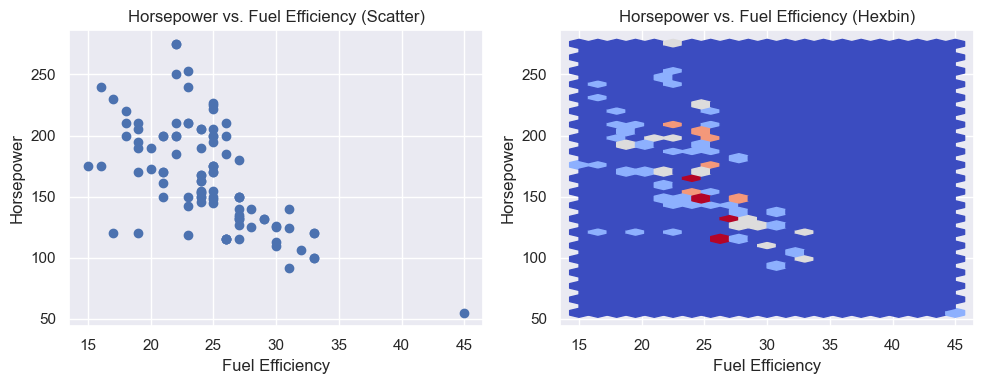

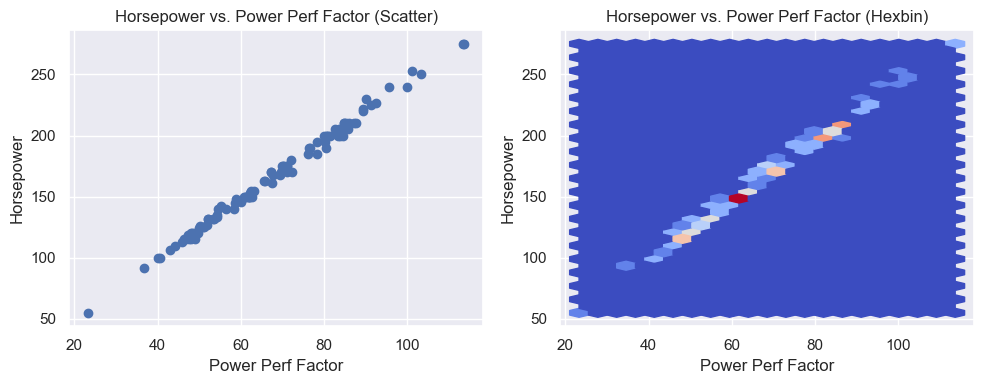

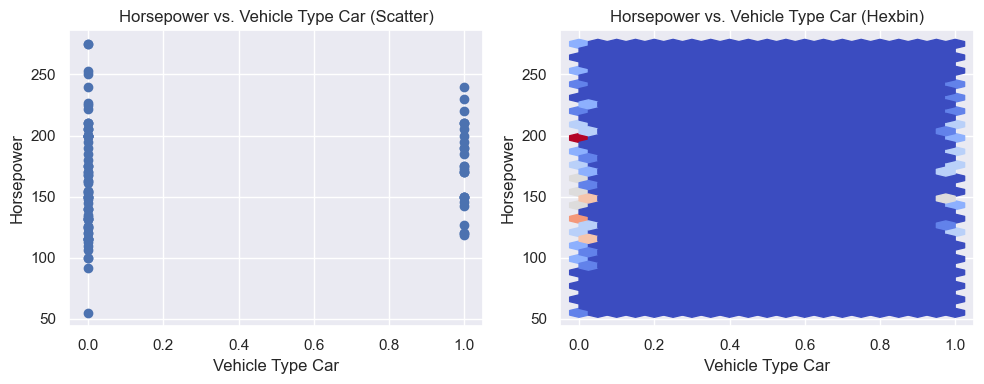

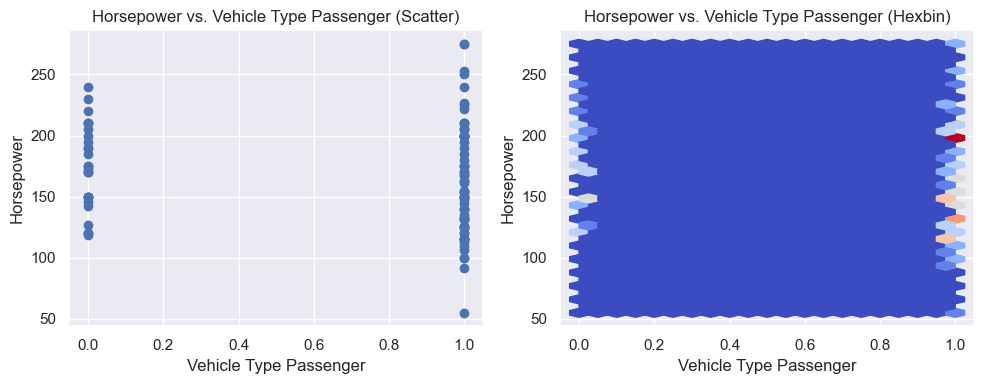

In [22]:
target = "Horsepower"
for col, _ in df.items():
    if col != target:
        visualize_feature_correlations(df ,col, target)

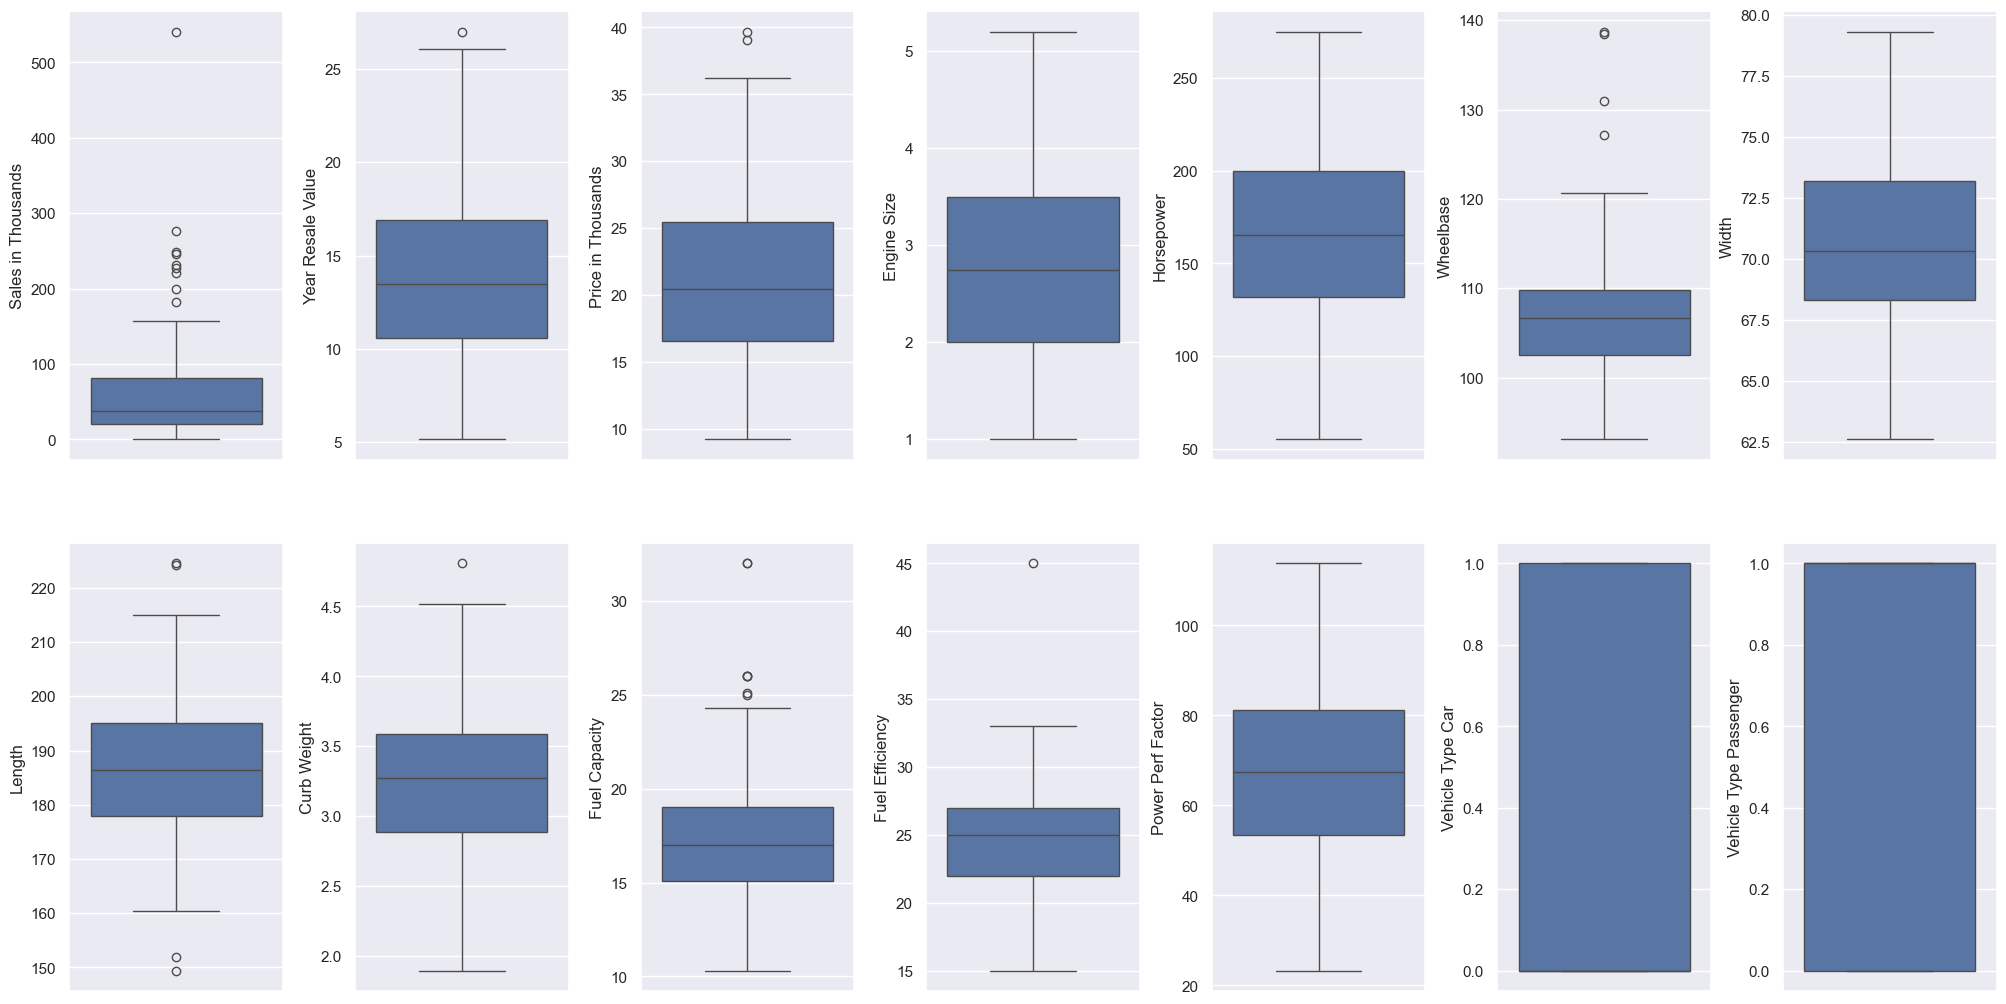

In [23]:
sns.set_theme()
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, _ in df.items():
    sns.boxplot(y=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
for col, value in df.items():
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    irq = q3 - q1
    value_col = value[(value <= q1 - 1.5 * irq) | (value >= q3 + 1.5 * irq)]
    perc = np.shape(value_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (col, perc))

Column Sales in Thousands outliers = 9.00%
Column Year Resale Value outliers = 1.00%
Column Price in Thousands outliers = 2.00%
Column Engine Size outliers = 0.00%
Column Horsepower outliers = 0.00%
Column Wheelbase outliers = 4.00%
Column Width outliers = 0.00%
Column Length outliers = 4.00%
Column Curb Weight outliers = 1.00%
Column Fuel Capacity outliers = 7.00%
Column Fuel Efficiency outliers = 1.00%
Column Power Perf Factor outliers = 0.00%
Column Vehicle Type Car outliers = 0.00%
Column Vehicle Type Passenger outliers = 0.00%


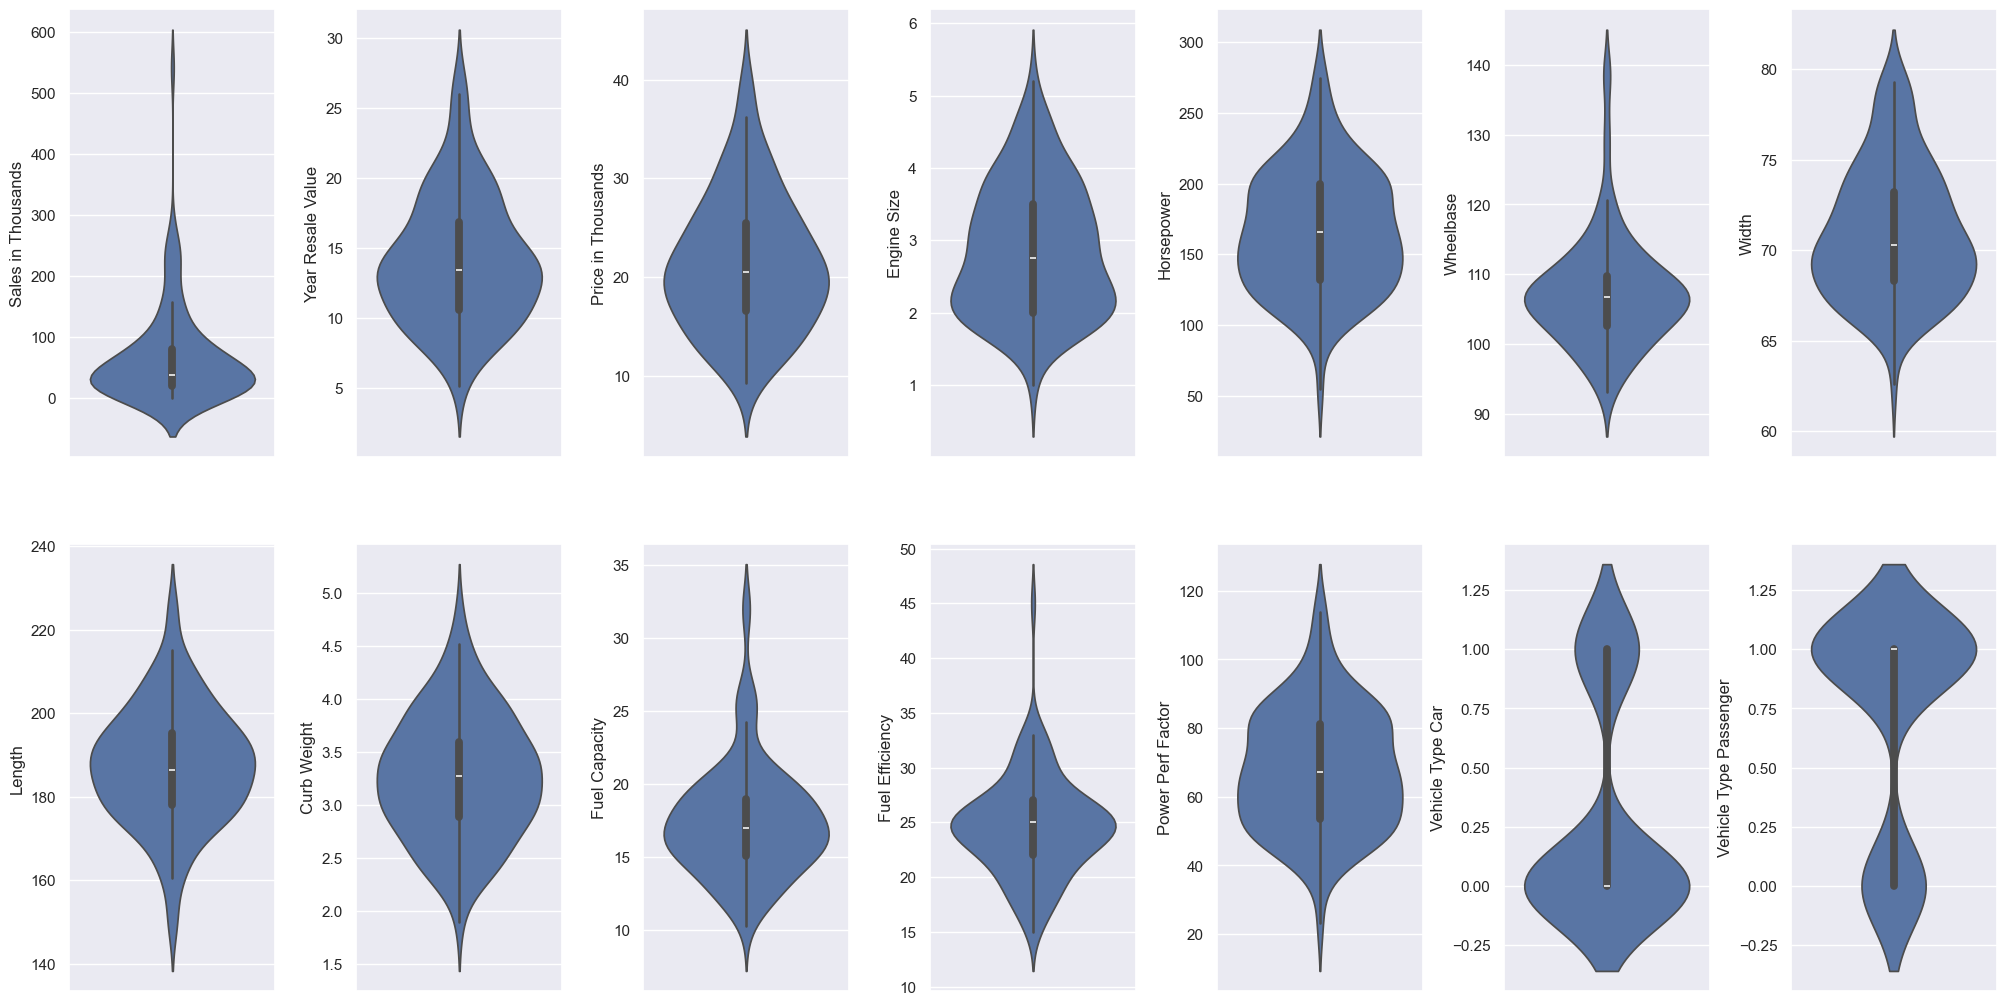

In [25]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, _ in df.items():
    sns.violinplot(y=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

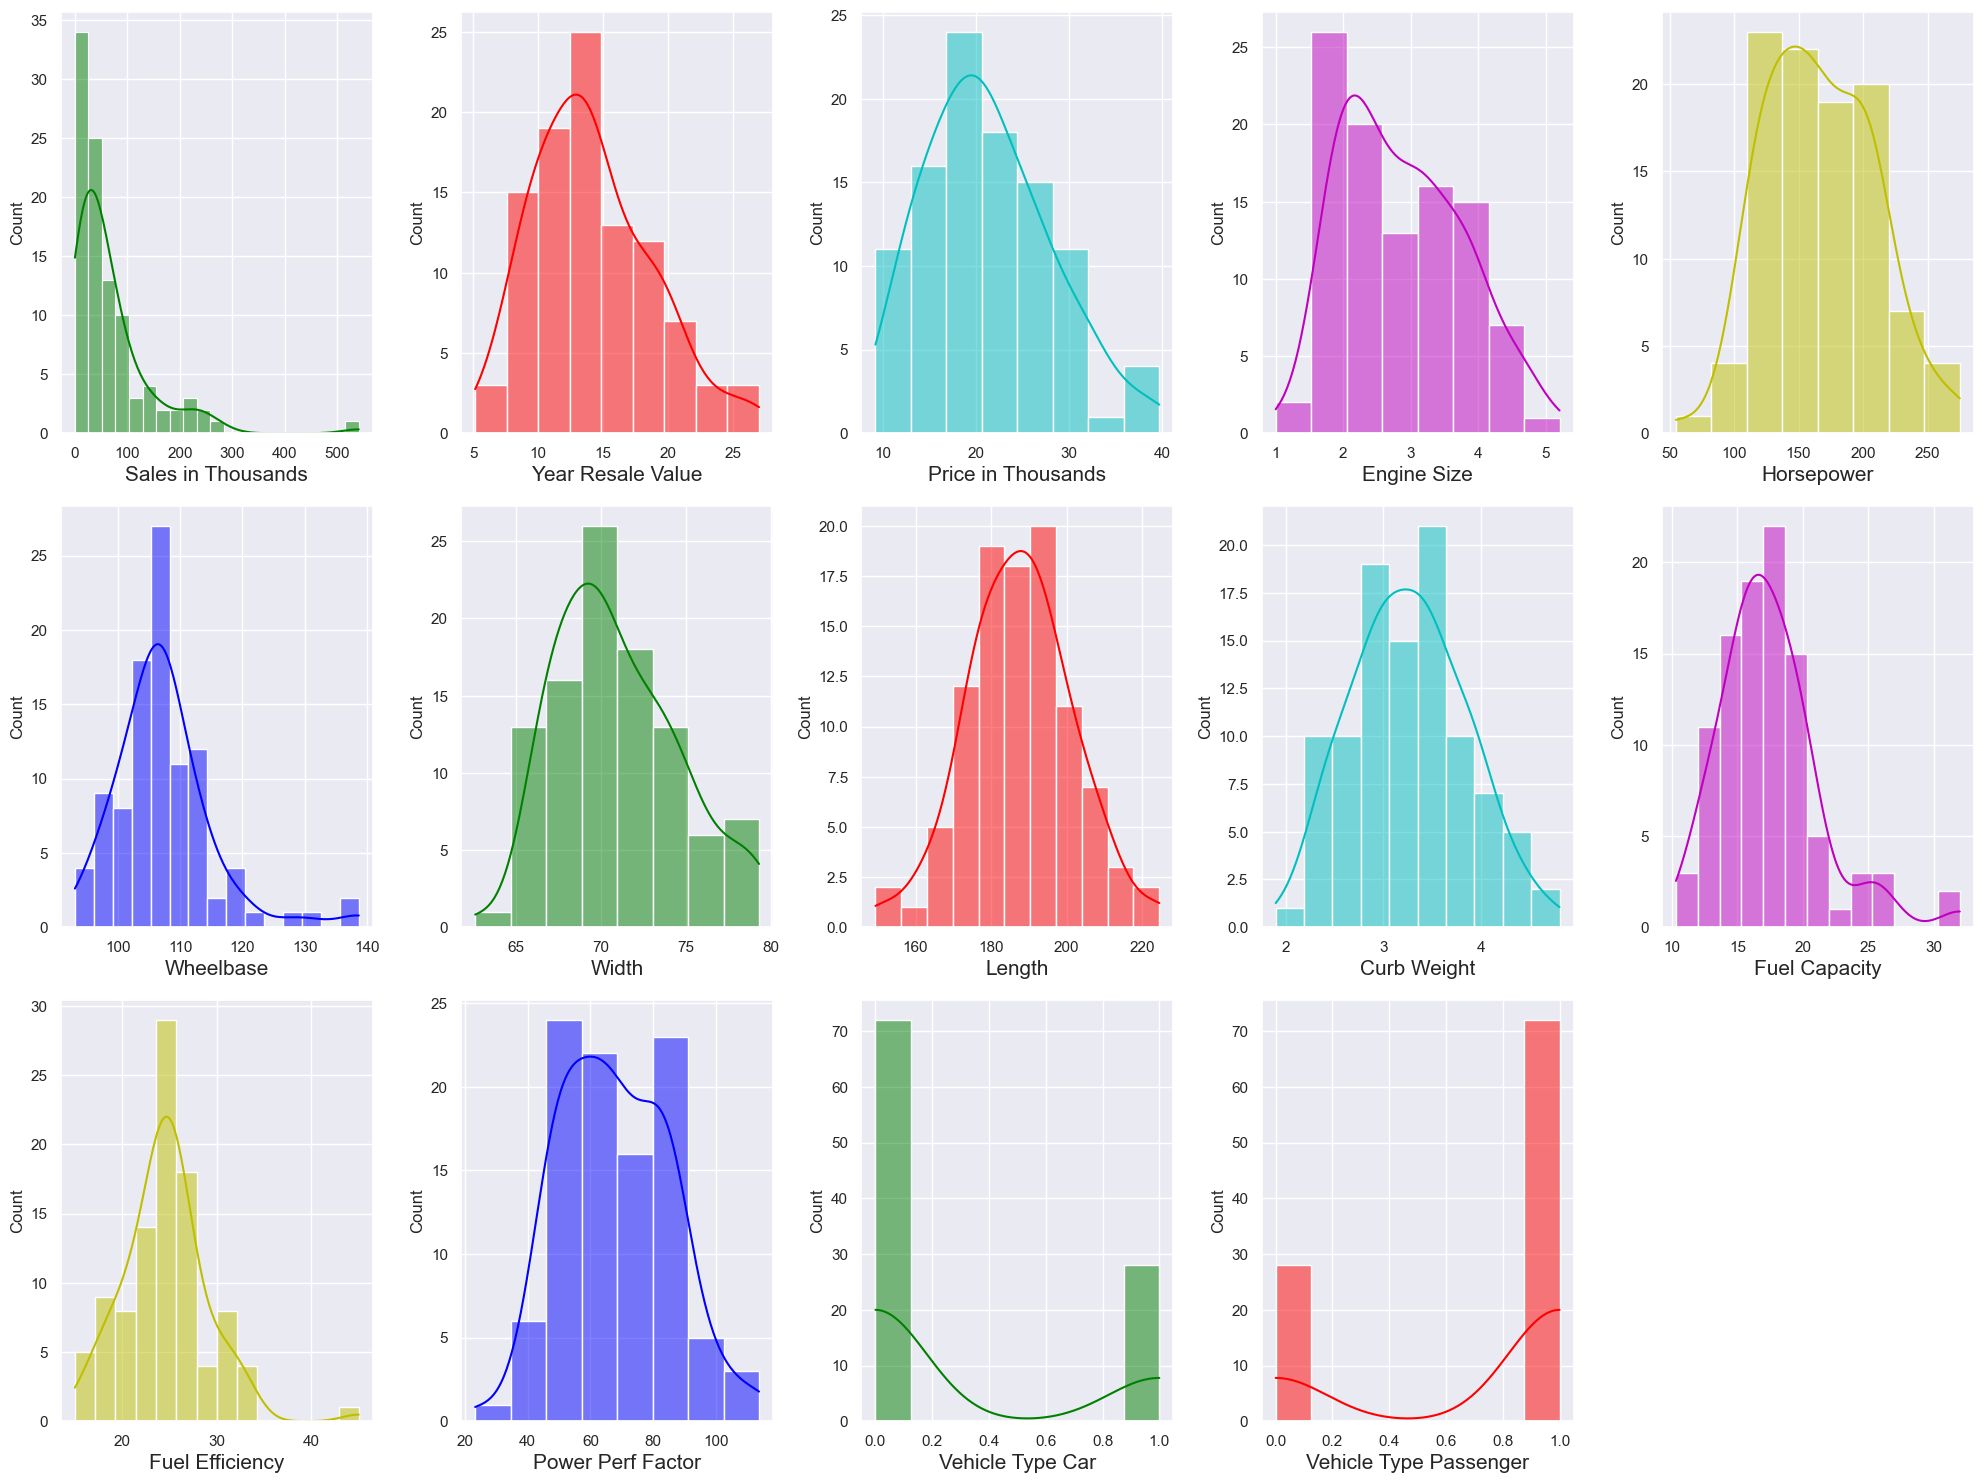

In [26]:
base_colors = list(mcolors.BASE_COLORS.values())
plt.figure(figsize = (20, 15))
sns.set_theme()

index = 1
for column in df:
    ax = plt.subplot(3, 5, index)
    sns.histplot(data=df, x=column, kde=True, color= base_colors[index % 6])
    plt.xlabel(column, fontsize = 15)        
    index += 1
    
plt.tight_layout()
plt.show()

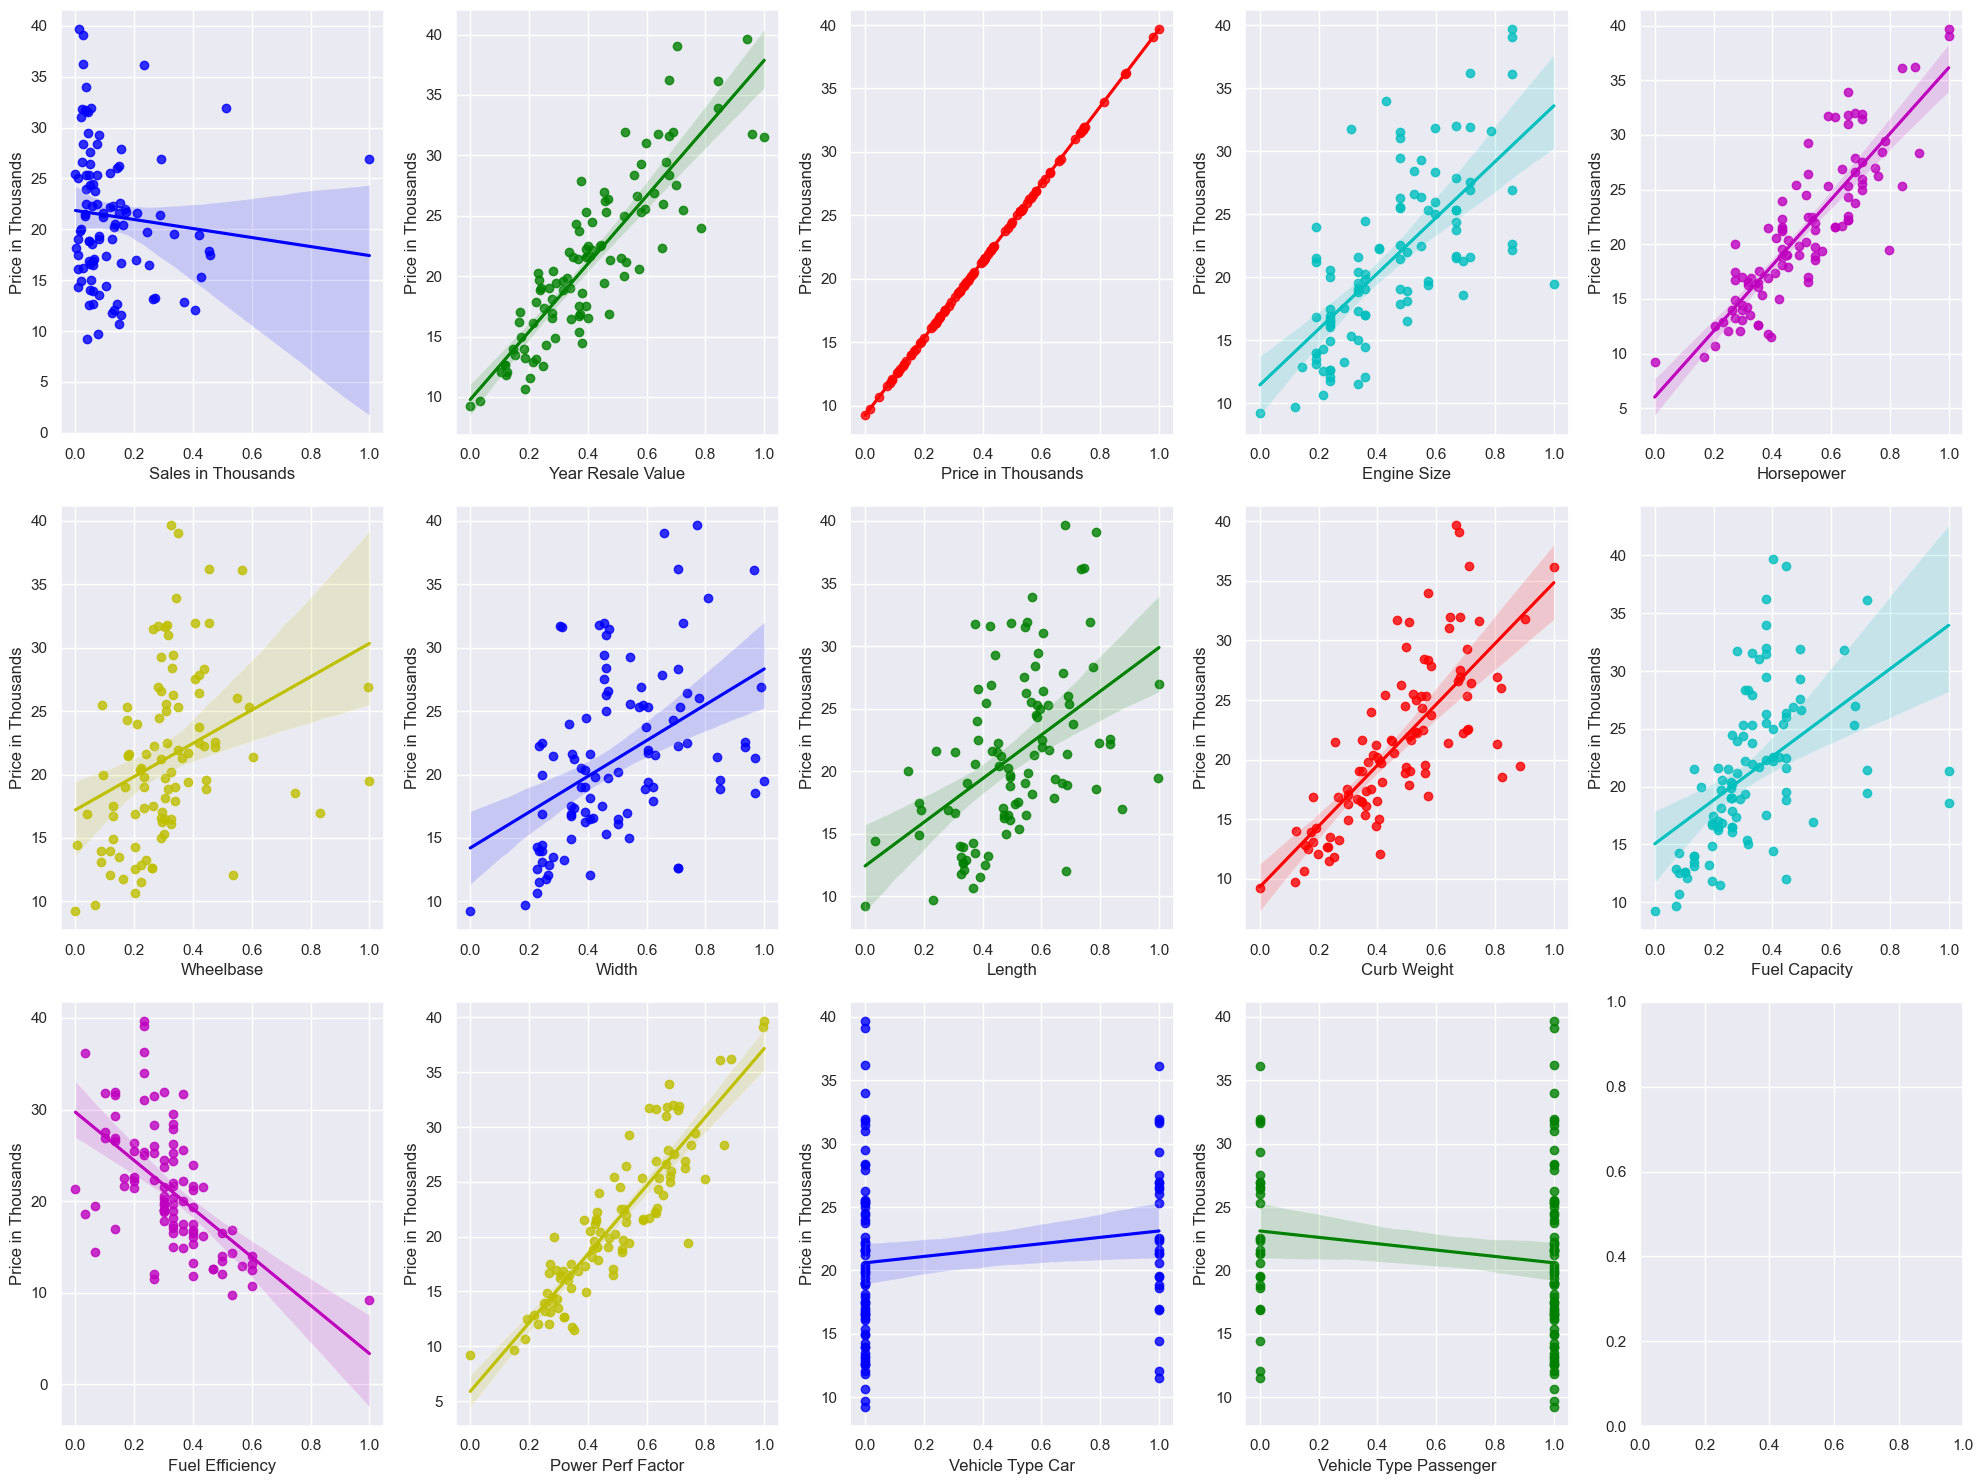

In [31]:
target = 'Price in Thousands'
sns.set_theme()
base_colors = list(mcolors.BASE_COLORS.values())

min_max_scaler = MinMaxScaler()
column_sels = df.columns.values.tolist()
X = df.loc[:,:].copy()
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 15))
axs = axs.flatten()
for i, col in enumerate(column_sels):
    sns.regplot(y=df[target], x=X[col], ax=axs[i], color= base_colors[i % 6])
    
plt.tight_layout()
plt.show()


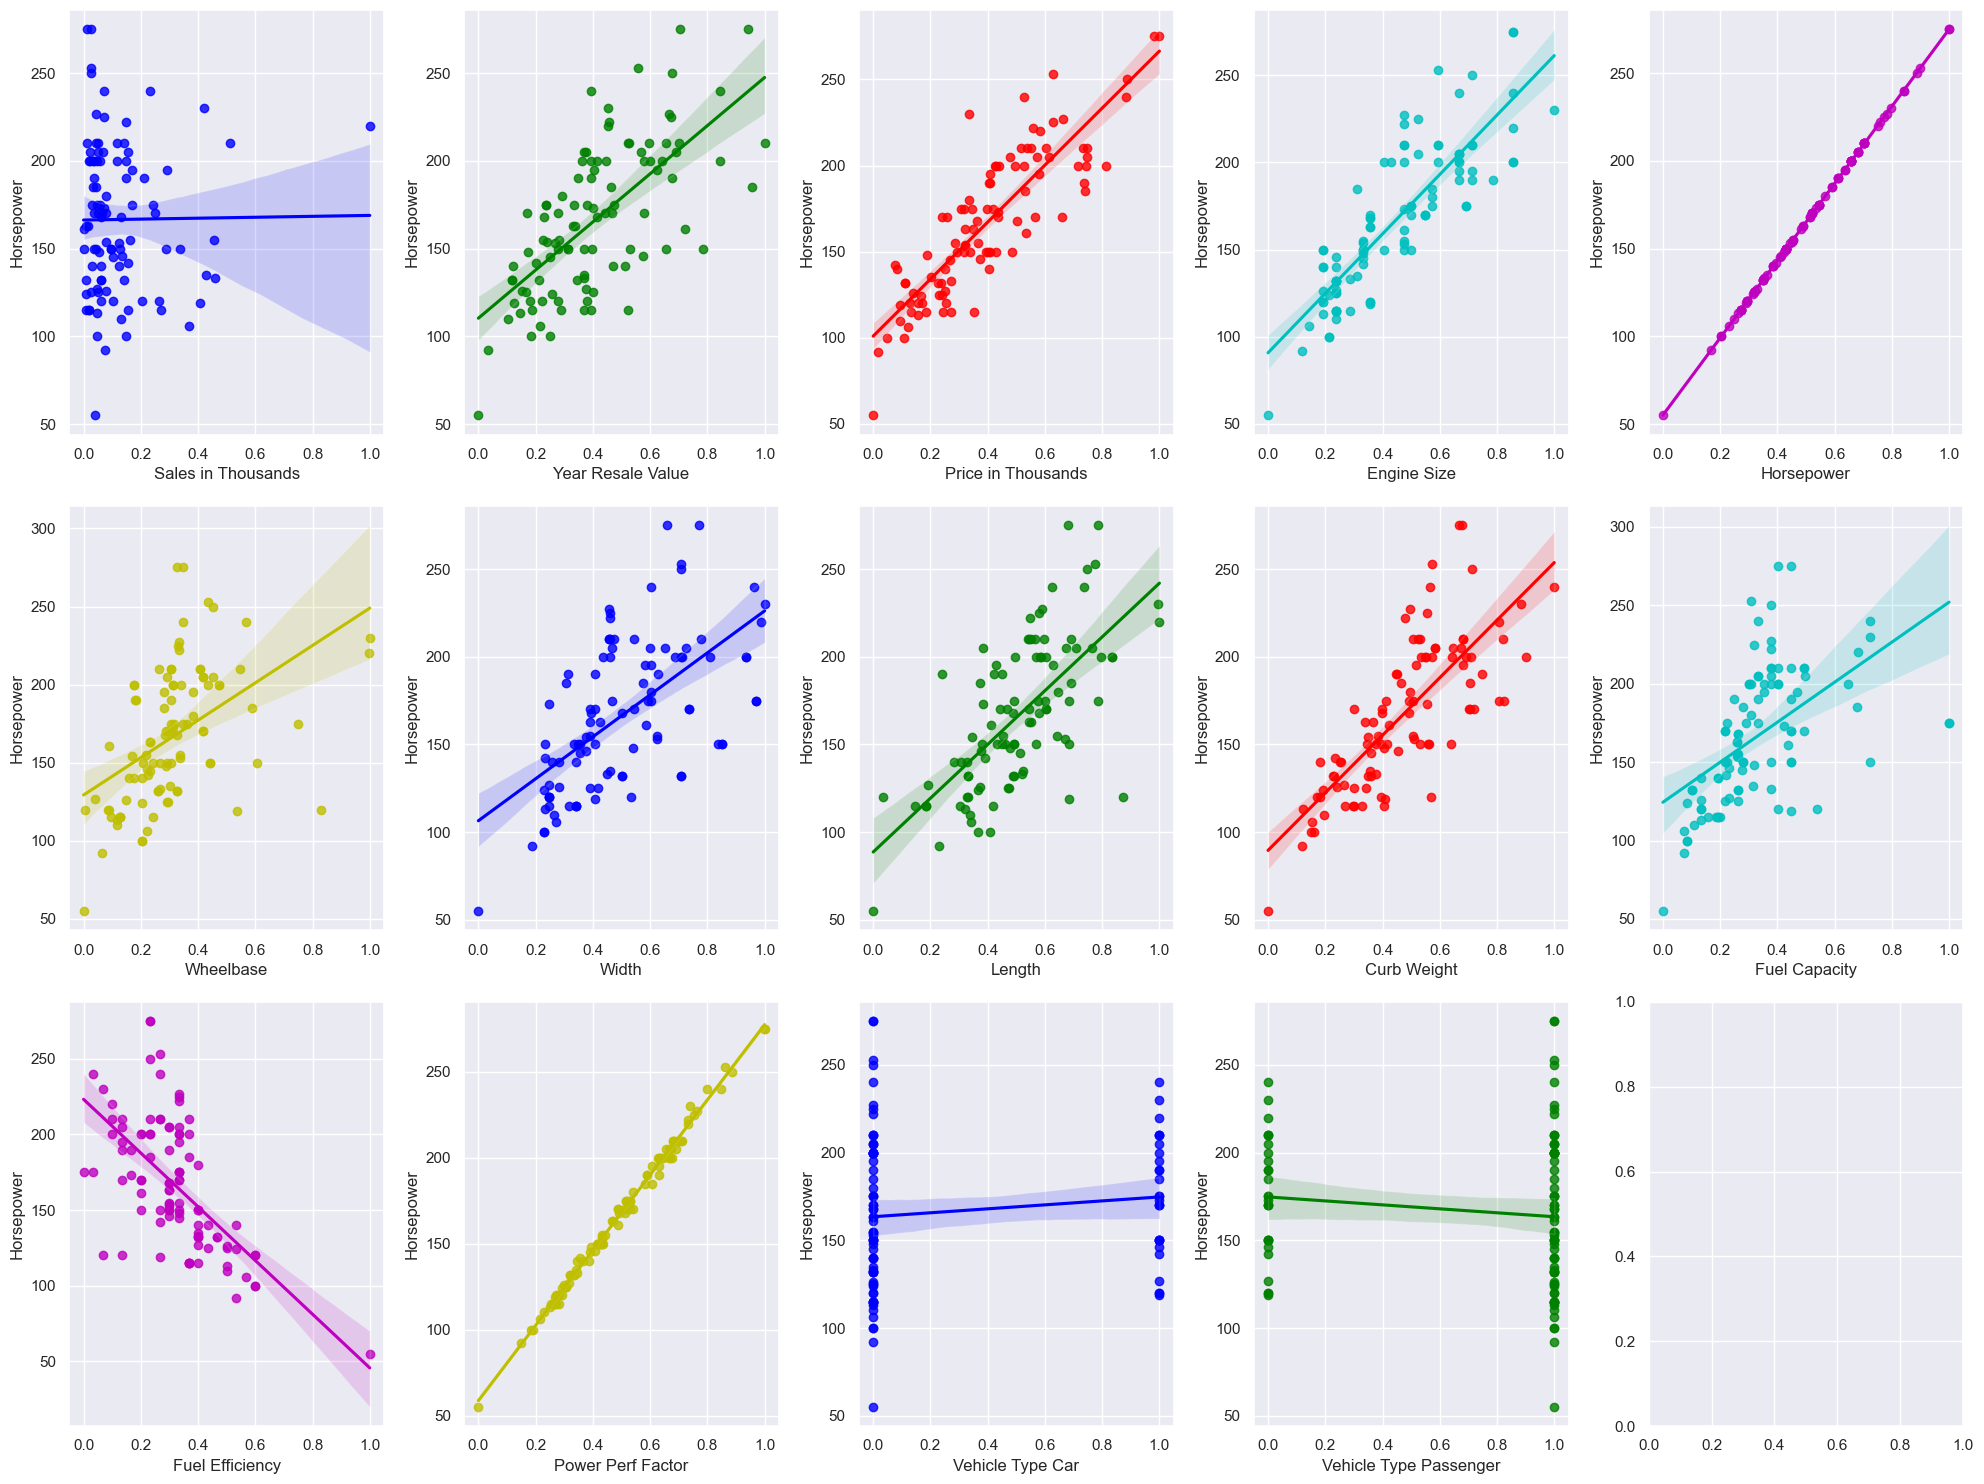

In [32]:
target = 'Horsepower'
sns.set_theme()
base_colors = list(mcolors.BASE_COLORS.values())

min_max_scaler = MinMaxScaler()
column_sels = df.columns.values.tolist()
X = df.loc[:,:].copy()
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 15))
axs = axs.flatten()
for i, col in enumerate(column_sels):
    sns.regplot(y=df[target], x=X[col], ax=axs[i], color= base_colors[i % 6])
    
plt.tight_layout()
plt.show()

## Preprocessing of dataset

In [45]:
# Identify columns with correlation of close to 1
df = pd.read_csv(file_name)
correlation = df.corr()
highly_correlated_cols = set()
cols_to_remove = set()
correlated_cols = set()
for col in correlation.columns:
    for other_col in correlation.columns:
        if col != other_col and correlation.loc[col, other_col] == 1:
            if not(other_col in highly_correlated_cols) and not(col in highly_correlated_cols):
                cols_to_remove.add(other_col)
            if not((other_col, col) in correlated_cols):
                correlated_cols.add((col, other_col))
            highly_correlated_cols.add(col)
            highly_correlated_cols.add(other_col)

# Drop the extra columns
for col in cols_to_remove:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

if correlated_cols:
    print("correlated columns:")
    for correlated in correlated_cols:
        print(correlated[0], "and", correlated[1])

if cols_to_remove:
    print("---------------------")
    print(f"Dropped columns: {', '.join(cols_to_remove)}")

<Figure size 500x500 with 0 Axes>

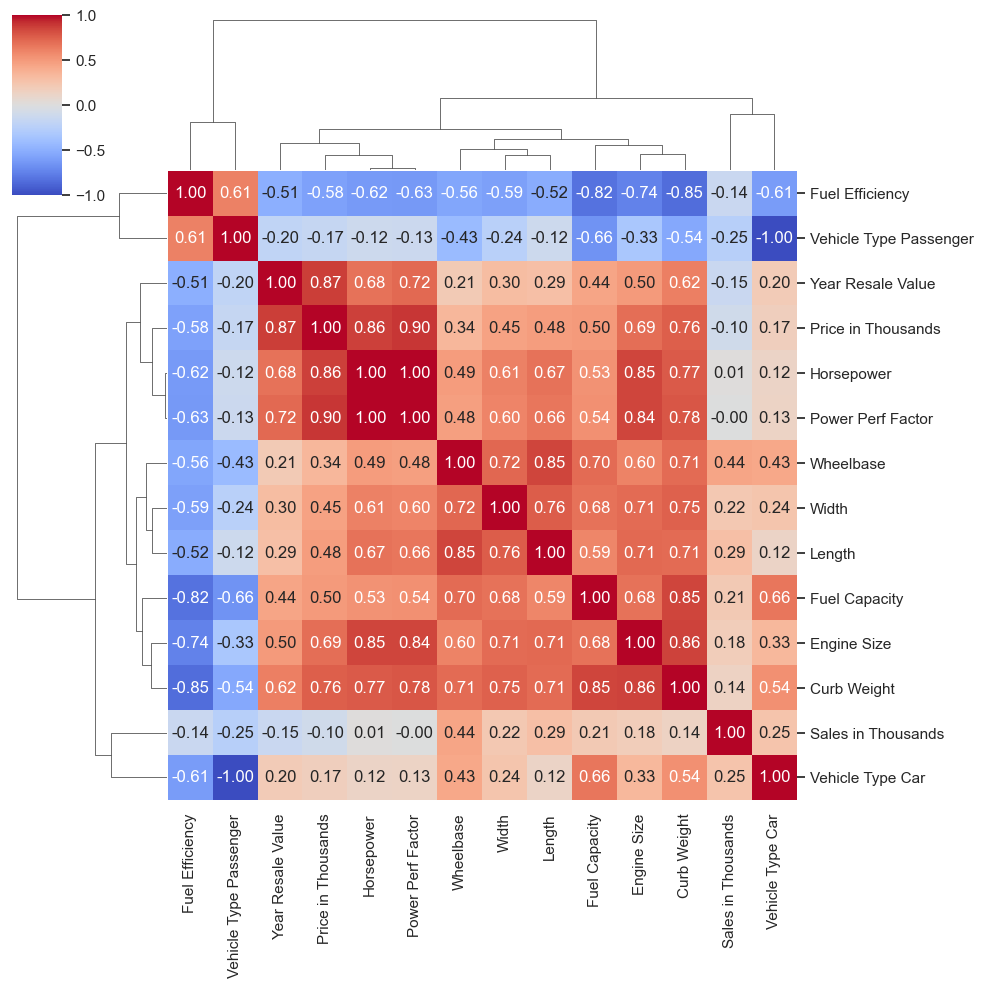

In [46]:
corr_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [103]:
X_price = df.drop('Price in Thousands', axis=1)  
y_price = df['Price in Thousands']

# Split data into training and testing sets (80%/20%)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=0)

# Split data into training and testing sets (50%/50%)
X_validation_price, X_test_price, y_validation_price, y_test_price = train_test_split(X_test_price, y_test_price, test_size=0.5, random_state=0)

In [104]:
X_power = df.drop('Horsepower', axis=1)  
y_power = df['Horsepower']

# Split data into training and testing sets (80%/20%)
X_train_power, X_test_power, y_train_power, y_test_power = train_test_split(X_power, y_power, test_size=0.2, random_state=0)

# Split data into training and testing sets (50%/50%)
X_validation_price, X_test_price, y_validation_price, y_test_price = train_test_split(X_test_power, y_test_power, test_size=0.5, random_state=0)

## Multivariate Regression Implementation

**Multivariate Regression**:

Multivariate regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multivariate regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + \dots + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, Multivariate regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{i1} + \hat \beta_{2} x_{i2} + \hat \beta_{i3} x_{3} + \hat \beta_{4} x_{i4} + \dots + \hat \beta_{n} x_{in}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + \dots + \hat \beta_{n} x_{jn})) x_{ji} $$

![Gradient Descent](https://www.researchgate.net/profile/Mario-Souto/publication/295010949/figure/fig2/AS:330626445135873@1455838895333/Ilustrative-example-of-rank-deficient-regression.png)

**Computing the Derivative**:

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$- 2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


**Gradient Descent**:

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

![Gradient Descent](https://res.cloudinary.com/practicaldev/image/fetch/s--5fkyAYDR--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://cdn-images-1.medium.com/max/1600/0%2AD7zG46WrdKx54pbU.gif)

In [105]:
def feature_derivative(errors, feature):
    return - 2 * (feature.T @  errors)

def predict_output(feature_matrix, weights, bias):
    return (feature_matrix @ weights) + bias

def regression_gradient_descent(feature_matrix, outputs, initial_weights, initial_bias, step_size, tolerance):
    gradient_length = np.inf
    weights = initial_weights
    bias = initial_bias

    while gradient_length > tolerance:
        predicted_values = predict_output(feature_matrix, weights, bias)
        errors = outputs - predicted_values
        derivative = feature_derivative(errors, feature_matrix)
        weights -= step_size * derivative
        bias += step_size * np.sum(errors)
        gradient_length = np.linalg.norm(derivative)
    
    return weights, bias

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame.loc[:, feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features, X_train, y_train):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10, 
        'bias': 0
    }

    chosen_feature_dataframe = X_train.loc[:,chosen_features]
    chosen_feature_matrix = normalize_features(chosen_features, chosen_feature_dataframe).to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, y_train.to_numpy(), keywords)

    return chosen_feature_matrix, train_weights, bias

**Evaluation Metrics**:

- **Mean Squared Error (MSE)**: MSE is the average of the squares of the errors, which are the differences between the predicted and actual values.

- **Mean Absolute Error (MAE)**: MAE is the average of the absolute differences between the predicted and actual values.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE. It's a measure of the differences between values predicted by a model and the values actually observed.

- **R² Score (Coefficient of Determination)**: R² Score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

$$
    R^{2} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n}\left ( y_{i} - \widehat{y_{i}} \right )^{2}}{\sum_{i=1}^{n}\left ( y_{i} - \mu \right )^{2}}
$$

In [90]:
def get_mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def get_mean_absolute_error(y_true, y_pred):
    return np.abs(y_true - y_pred).mean()

def get_root_mean_squared_error(y_true, y_pred):
    return np.sqrt(get_mean_squared_error(y_true, y_pred))

def get_r_squared(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (rss / tss)

def evaluate_model(chosen_features, X_train, X_test, y_train, y_test):
    X_test_dataframe = X_test.loc[:,chosen_features]
    X_test_matrix = normalize_features(chosen_features, X_test_dataframe).to_numpy()
    chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features, X_train, y_train)

    predicted_train = predict_output(chosen_feature_matrix, train_weights, bias)
    predictedt_test = predict_output(X_test_matrix, train_weights, bias)

    MSE_train = get_mean_squared_error(y_train, predicted_train)
    MAE_train = get_mean_absolute_error(y_train, predicted_train)
    RMSE_train = get_root_mean_squared_error(y_train, predicted_train)
    R2_score_train = get_r_squared(y_train, predicted_train)

    MSE_test = get_mean_squared_error(y_test, predictedt_test)
    MAE_test = get_mean_absolute_error(y_test, predictedt_test)
    RMSE_test = get_root_mean_squared_error(y_test, predictedt_test)
    R2_score_test = get_r_squared(y_test, predictedt_test)

    values = [[MSE_train, MAE_train, RMSE_train, R2_score_train],[MSE_test, MAE_test, RMSE_test, R2_score_test]]
    evaluation_df = pd.DataFrame(values, index=['Train', 'Test'], columns=['MSE', "MAE", "RMSE", "R² Score"])

    return evaluation_df, predicted_train, predictedt_test

def visualize_regression(y_train, y_test, predicted_train, predictedt_test):
    sns.set_theme()
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.scatter(y_train, predicted_train, alpha=.75, edgecolors='k')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Train: Actual vs Predicted')

    plt.subplot(1,2,2)
    plt.scatter(y_test, predictedt_test, alpha=.75, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Test: Actual vs Predicted')
    plt.show()

### target = Price in Thousands

In [66]:
target = "Price in Thousands"
correlation_matrix = df.corr(numeric_only=True)
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
sorted_correlations

Power Perf Factor         0.898002
Year Resale Value         0.871044
Horsepower                0.862995
Curb Weight               0.755530
Engine Size               0.694691
Fuel Efficiency           0.584143
Fuel Capacity             0.498726
Length                    0.482884
Width                     0.453516
Wheelbase                 0.336691
Vehicle Type Passenger    0.167606
Vehicle Type Car          0.167606
Sales in Thousands        0.095236
Name: Price in Thousands, dtype: float64

Number of Features= 1
Chosen Features: ['Power Perf Factor']

             MSE       MAE      RMSE  R² Score
Train   9.193565  2.381480  3.032089  0.758738
Test   17.217267  3.781286  4.149369  0.757813


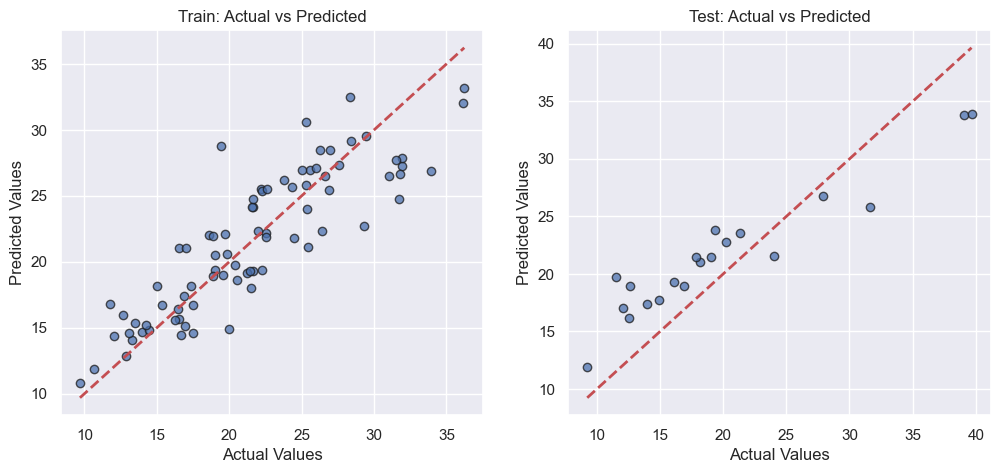

Number of Features= 2
Chosen Features: ['Power Perf Factor', 'Year Resale Value']

             MSE       MAE      RMSE  R² Score
Train   3.786167  1.493430  1.945807  0.900641
Test   12.122192  3.183568  3.481694  0.829483


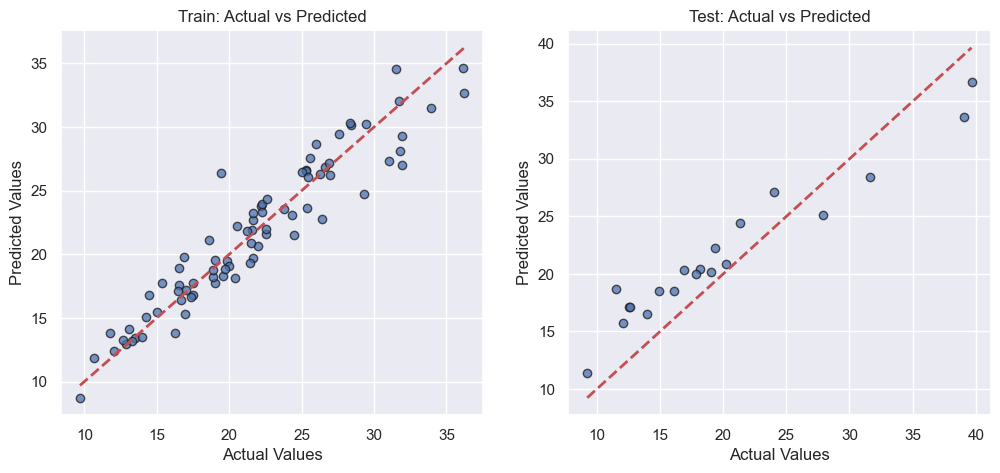

Number of Features= 3
Chosen Features: ['Power Perf Factor', 'Year Resale Value', 'Horsepower']

             MSE       MAE      RMSE  R² Score
Train   0.098809  0.256764  0.314340  0.997407
Test   11.403951  3.015892  3.376974  0.839586


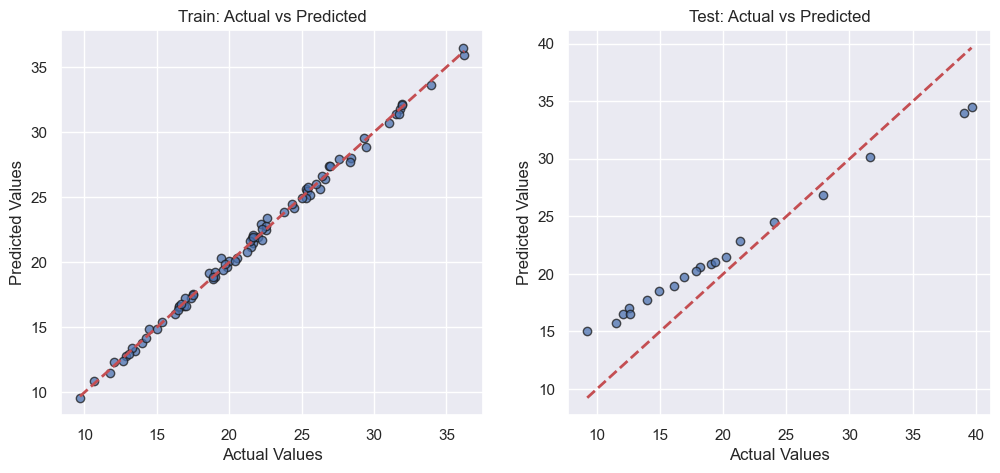

Number of Features= 4
Chosen Features: ['Power Perf Factor', 'Year Resale Value', 'Horsepower', 'Curb Weight']

             MSE       MAE      RMSE  R² Score
Train   0.054924  0.183008  0.234360  0.998559
Test   11.566545  3.014541  3.400962  0.837299


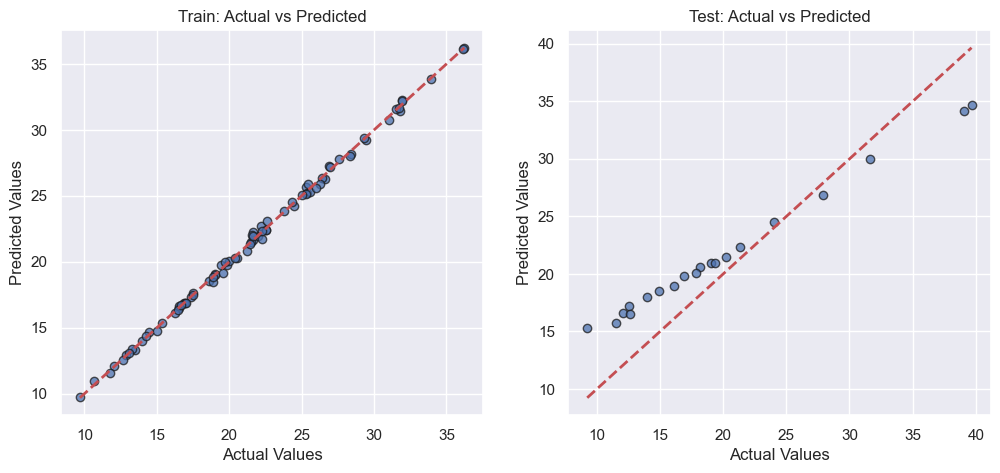

Number of Features= 5
Chosen Features: ['Power Perf Factor', 'Year Resale Value', 'Horsepower', 'Curb Weight', 'Engine Size']

                MSE           MAE          RMSE  R² Score
Train  1.344916e-16  8.137119e-09  1.159705e-08  1.000000
Test   1.183960e+01  3.087590e+00  3.440872e+00  0.833458


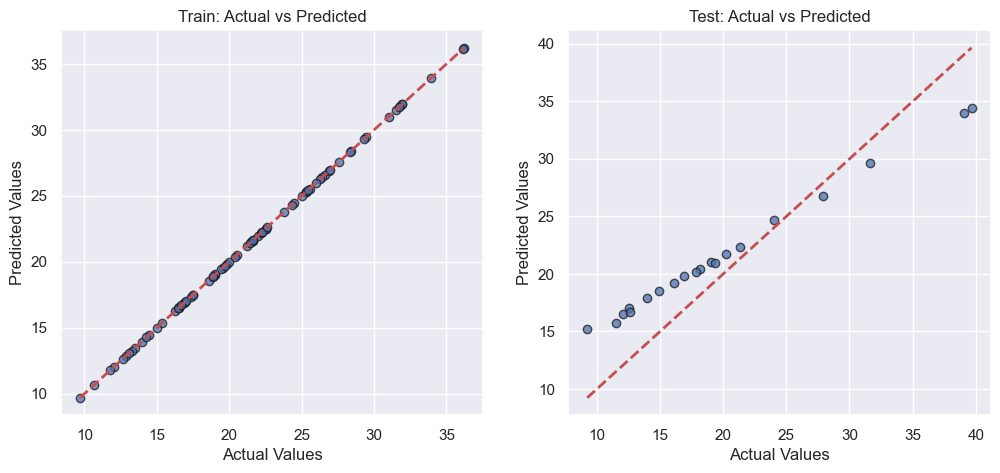

In [93]:
for i in range(1,6):    
    print(f"Number of Features= {i}")
    chosen_features = sorted_correlations.index[:i]
    print(f"Chosen Features: {list(chosen_features)}", end="\n\n")
    evaluation_df, predicted_train, predictedt_test = evaluate_model(chosen_features, X_train_price, X_test_price, y_train_price, y_test_price)
    print(evaluation_df)
    visualize_regression(y_train_price, y_test_price, predicted_train, predictedt_test)

In [95]:
target = "Horsepower"
correlation_matrix = df.corr(numeric_only=True)
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
sorted_correlations

Power Perf Factor         0.997233
Price in Thousands        0.862995
Engine Size               0.848398
Curb Weight               0.770866
Year Resale Value         0.675055
Length                    0.672694
Fuel Efficiency           0.624612
Width                     0.609895
Fuel Capacity             0.534204
Wheelbase                 0.487229
Vehicle Type Passenger    0.119569
Vehicle Type Car          0.119569
Sales in Thousands        0.009023
Name: Horsepower, dtype: float64

Number of Features= 1
Chosen Features: ['Power Perf Factor']

              MSE        MAE       RMSE  R² Score
Train   10.342307   2.544602   3.215946  0.993222
Test   402.548369  17.700668  20.063608  0.851443


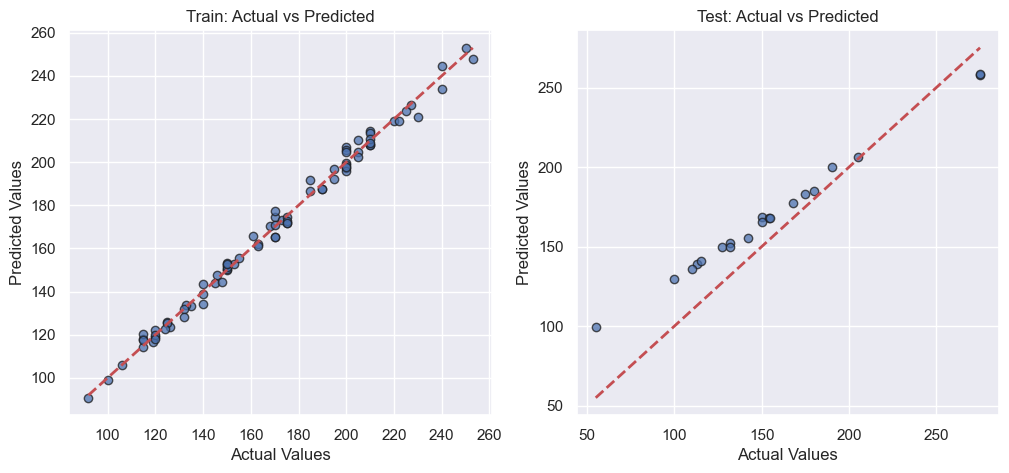

Number of Features= 2
Chosen Features: ['Power Perf Factor', 'Price in Thousands']

              MSE        MAE       RMSE  R² Score
Train    0.117713   0.286586   0.343093  0.999923
Test   410.299367  18.069754  20.255848  0.848583


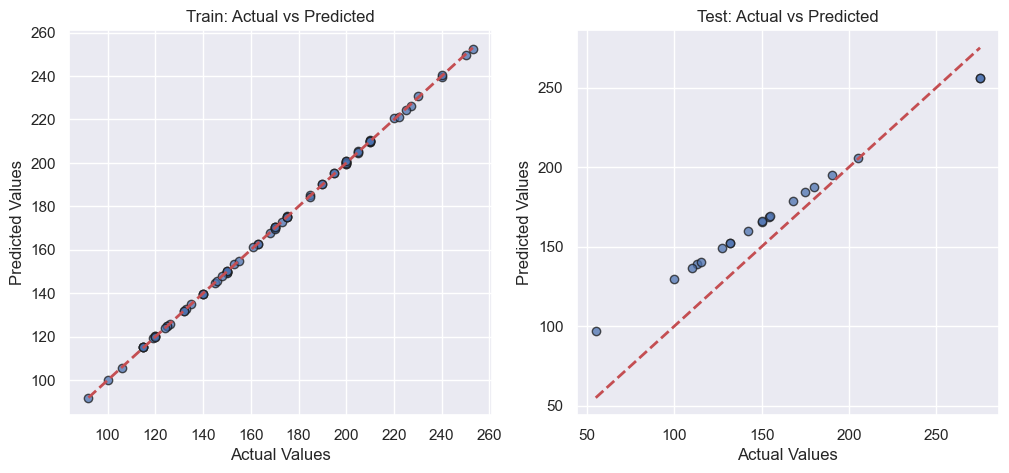

Number of Features= 3
Chosen Features: ['Power Perf Factor', 'Price in Thousands', 'Engine Size']

                MSE           MAE          RMSE  R² Score
Train  1.606767e-16  8.967863e-09  1.267583e-08  1.000000
Test   4.124322e+02  1.807510e+01  2.030843e+01  0.847796


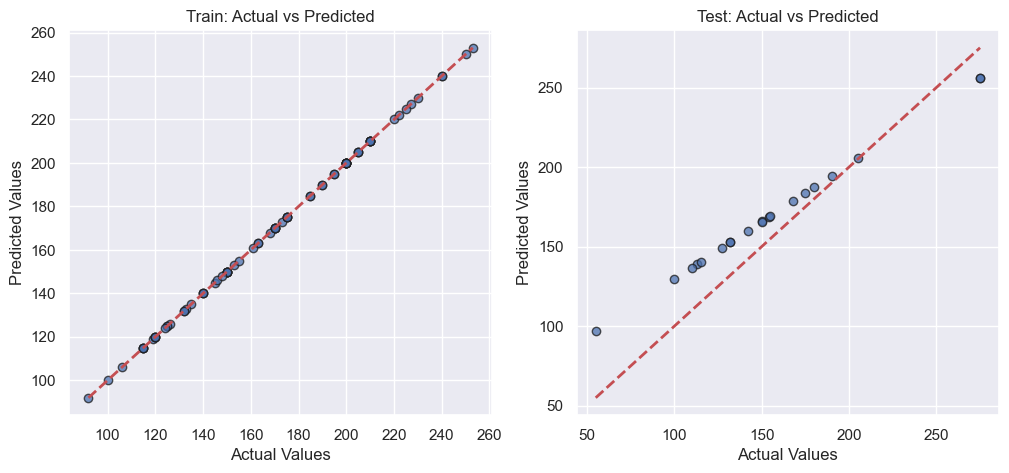

Number of Features= 4
Chosen Features: ['Power Perf Factor', 'Price in Thousands', 'Engine Size', 'Curb Weight']

                MSE           MAE          RMSE  R² Score
Train  1.605517e-16  8.967859e-09  1.267090e-08  1.000000
Test   4.124322e+02  1.807510e+01  2.030843e+01  0.847796


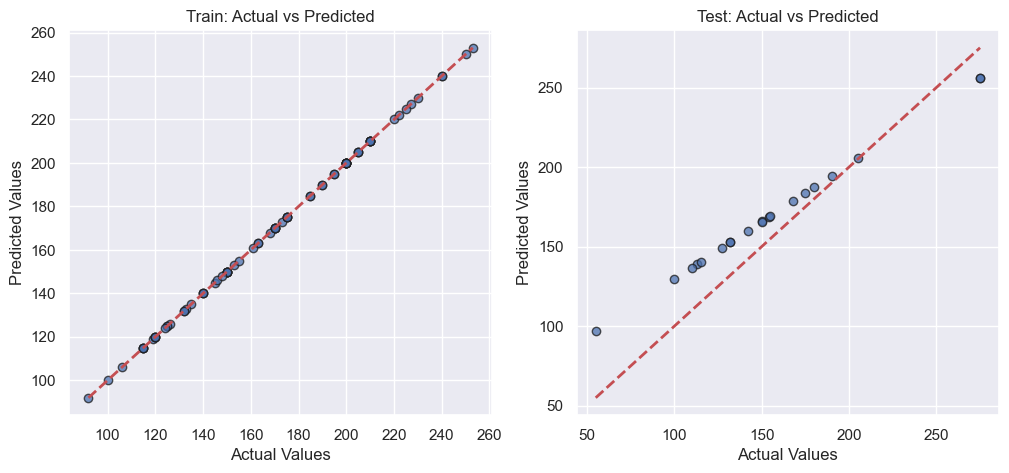

Number of Features= 5
Chosen Features: ['Power Perf Factor', 'Price in Thousands', 'Engine Size', 'Curb Weight', 'Year Resale Value']

                MSE           MAE          RMSE  R² Score
Train  1.599773e-16  8.875032e-09  1.264822e-08  1.000000
Test   4.124322e+02  1.807510e+01  2.030843e+01  0.847796


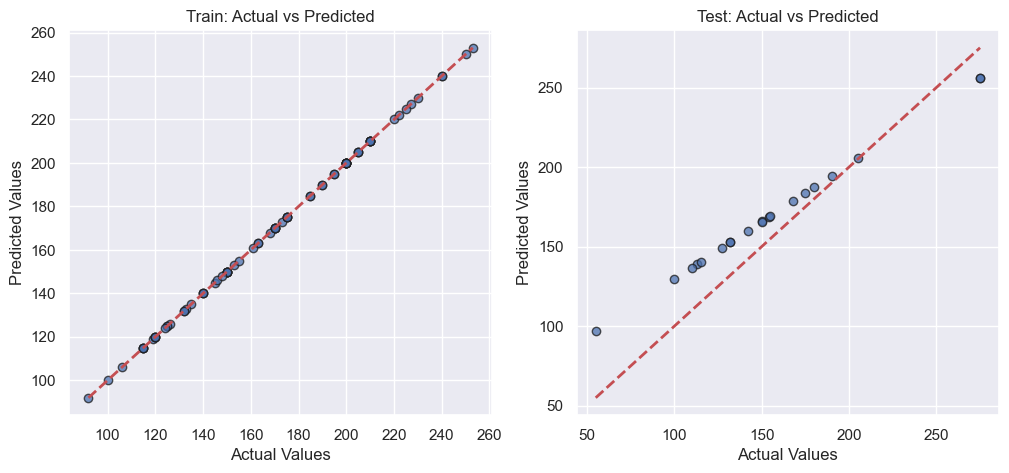

In [100]:
for i in range(1,6):    
    print(f"Number of Features= {i}")
    chosen_features = sorted_correlations.index[:i]
    print(f"Chosen Features: {list(chosen_features)}", end="\n\n")
    evaluation_df, predicted_train, predictedt_test = evaluate_model(chosen_features, X_train_power, X_test_power, y_train_power, y_test_power)
    print(evaluation_df)
    visualize_regression(y_train_power, y_test_power, predicted_train, predictedt_test)